In [731]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [732]:
users = pd.read_csv('data/Users.csv')

In [733]:
ratings = pd.read_csv('data/Ratings.csv')

In [734]:
books= pd.read_csv('data/Books2.csv', low_memory=False)

In [735]:
users[users['Age'] >= 100]


,User-ID,Location,Age
1288,1289,"san jose, california, usa",103.0
1322,1323,"milano, lombardia, italy",104.0
1578,1579,"akure, ondo/nigeria, nigeria",231.0
3084,3085,"zürich, switzerland, switzerland",104.0
3210,3211,"le mesnil saint denis, yvelines, france",119.0
...,...,...,...
276047,276048,"wien, wien, austria",127.0
276352,276353,"hillsdale, new york, usa",104.0
277107,277108,"quinto, ticino, switzerland",104.0
277503,277504,"san diego, california, usa",103.0


In [736]:
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

In [737]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [738]:
users.duplicated().sum()

0

In [739]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [740]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [741]:
# Checking duplicates on client id
users_duplicates = users.duplicated(subset = 'User-ID', keep = False)
users[users_duplicates]


,User-ID,Location,Age


In [742]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [743]:
ratings.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [744]:
ratings.duplicated().sum()

0

In [745]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [746]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277719,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


In [747]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [748]:
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       118
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [749]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [750]:
books.duplicated().sum()

0

In [751]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [752]:
books.describe().T

,count,unique,top,freq
ISBN,271360,271360,0195153448,1
Book-Title,271360,242135,Selected Poems,27
Book-Author,271358,102022,Agatha Christie,632
Year-Of-Publication,271360,118,2002,17627
Publisher,271358,16807,Harlequin,7535
Image-URL-S,271360,271044,http://images.amazon.com/images/P/185326119X.0...,2
Image-URL-M,271360,271044,http://images.amazon.com/images/P/185326119X.0...,2
Image-URL-L,271357,271041,http://images.amazon.com/images/P/225307649X.0...,2


In [753]:
def lowercase_columns(df):
    """
    Converts all column names of the given DataFrame to lowercase.

    Parameters:
    df (pd.DataFrame): The pandas DataFrame whose column names need to be converted.

    Returns:
    pd.DataFrame: A DataFrame with all column names in lowercase.
    """
    df.columns = [col.lower() for col in df.columns]
    
    return df


In [754]:
lowercase_columns(users)

,user-id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [755]:
lowercase_columns(ratings)

,user-id,isbn,book-rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [756]:
lowercase_columns(books)

,isbn,book-title,book-author,year-of-publication,publisher,image-url-s,image-url-m,image-url-l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [757]:
users.fillna('unknown', inplace=True)

/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/1488387352.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  users.fillna('unknown', inplace=True)


In [758]:
users["age"]

0         unknown
1            18.0
2         unknown
3            17.0
4         unknown
           ...   
278853    unknown
278854       50.0
278855    unknown
278856    unknown
278857    unknown
Name: age, Length: 278858, dtype: object

In [760]:
books.fillna('unknown', inplace=True)

In [761]:
books.isnull().sum()

isbn                   0
book-title             0
book-author            0
year-of-publication    0
publisher              0
image-url-s            0
image-url-m            0
image-url-l            0
dtype: int64

In [762]:
books['isbn'].duplicated().sum()

0

In [764]:
users

,user-id,location,age
0,1,"nyc, new york, usa",unknown
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",unknown
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",unknown
...,...,...,...
278853,278854,"portland, oregon, usa",unknown
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",unknown
278856,278857,"knoxville, tennessee, usa",unknown


In [765]:
def replace_hyphen_in_columns(df):
    """
    Replaces all occurrences of hyphens (-) with underscores (_) in the column names of a DataFrame.

    Parameters:
    df (pd.DataFrame): The pandas DataFrame whose column names need to be modified.

    Returns:
    pd.DataFrame: The DataFrame with modified column names.
    """
    df.columns = df.columns.str.replace('-', '_')
    return df

In [766]:
replace_hyphen_in_columns(users)

,user_id,location,age
0,1,"nyc, new york, usa",unknown
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",unknown
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",unknown
...,...,...,...
278853,278854,"portland, oregon, usa",unknown
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",unknown
278856,278857,"knoxville, tennessee, usa",unknown


In [767]:
replace_hyphen_in_columns(ratings)

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [768]:
replace_hyphen_in_columns(books)

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [769]:
ratings.sort_values(by="isbn",ascending=True)

,user_id,isbn,book_rating
750718,181817,0330299891,6
371986,89192,0330299891,0
371987,89192,0375404120,3
1112730,266865,0375404120,0
371988,89192,0586045007,0
...,...,...,...
447770,107301,cn113107,0
1109374,266146,ooo7156103,7
353525,85250,§423350229,0
357163,86103,´3499128624,8


In [770]:
ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [771]:
ratings.sort_values(by='book_rating', ascending=True)

,user_id,isbn,book_rating
0,276725,034545104X,0
687400,167471,0806515082,0
687402,167471,0806958855,0
687403,167471,080698323X,0
687407,167471,0811841405,0
...,...,...,...
272376,63625,0316168815,10
222656,52044,0486287297,10
272375,63625,0312147015,10
406256,98391,0312252617,10


In [772]:
books.sort_values(by='year_of_publication', ascending=True)

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
212233,0947901051,Collect Post Office Cards,A. Roberts,0,Benham (A. Buckingham) Ltd,http://images.amazon.com/images/P/0947901051.0...,http://images.amazon.com/images/P/0947901051.0...,http://images.amazon.com/images/P/0947901051.0...
51621,0006479561,Sacred Clowns,Tony Hillerman,0,Fairmount Books Ltd Remainders,http://images.amazon.com/images/P/0006479561.0...,http://images.amazon.com/images/P/0006479561.0...,http://images.amazon.com/images/P/0006479561.0...
193438,0140382690,The Enemy You Killed,Peter McFarlane,0,Penguin Books Australia Ltd,http://images.amazon.com/images/P/0140382690.0...,http://images.amazon.com/images/P/0140382690.0...,http://images.amazon.com/images/P/0140382690.0...
25016,0879972734,Walkers On the Sky,David J Lake,0,Penguin Putnam~mass,http://images.amazon.com/images/P/0879972734.0...,http://images.amazon.com/images/P/0879972734.0...,http://images.amazon.com/images/P/0879972734.0...
17668,0590023888,Misty of Chincoteague,Marguerite Henry,0,Scholastic Inc,http://images.amazon.com/images/P/0590023888.0...,http://images.amazon.com/images/P/0590023888.0...,http://images.amazon.com/images/P/0590023888.0...
...,...,...,...,...,...,...,...,...
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,unknown
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,unknown


/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/449181911.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=ratings, x= "book_rating", palette='pastel')


[Text(0.5, 0, 'Book Rating'), Text(0, 0.5, 'Number of Books')]

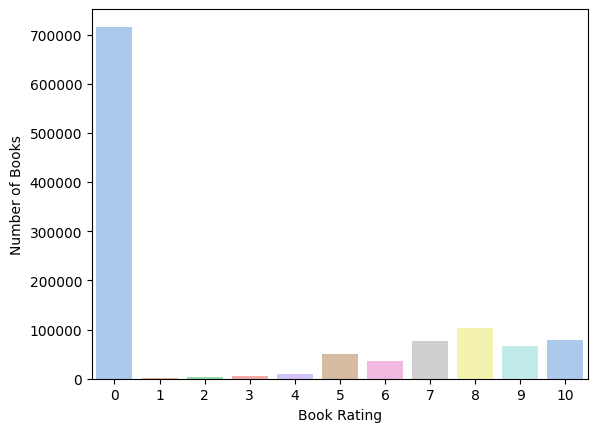

In [773]:
ax=sns.countplot(data=ratings, x= "book_rating", palette='pastel')
ax.set(xlabel='Book Rating', ylabel='Number of Books')

In [774]:
# Filter the DataFrame to include only rows where 'book_rating' is 0
zero_rating_books = ratings[ratings['book_rating'] == 0]

# Print the filtered DataFrame
print(zero_rating_books)

# Optionally, count how many times 0 appears
zero_rating_count = zero_rating_books['book_rating'].value_counts()
print(f"Number of books with a rating of 0: {zero_rating_count[0]}")

         user_id        isbn  book_rating
0         276725  034545104X            0
2         276727  0446520802            0
5         276733  2080674722            0
10        276746  0425115801            0
11        276746  0449006522            0
...          ...         ...          ...
1149769   276704  059032120X            0
1149770   276704  0679752714            0
1149772   276704  080410526X            0
1149774   276704  0876044011            0
1149776   276706  0679447156            0

[716109 rows x 3 columns]
Number of books with a rating of 0: 716109


/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/388760495.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ax1=sns.countplot(y='book_title',data=books,order=pd.value_counts(books['book_title']).iloc[:20].index, palette="pastel")
/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/388760495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1=sns.countplot(y='book_title',data=books,order=pd.value_counts(books['book_title']).iloc[:20].index, palette="pastel")


Text(0.5, 1.0, 'Top 20 Books')

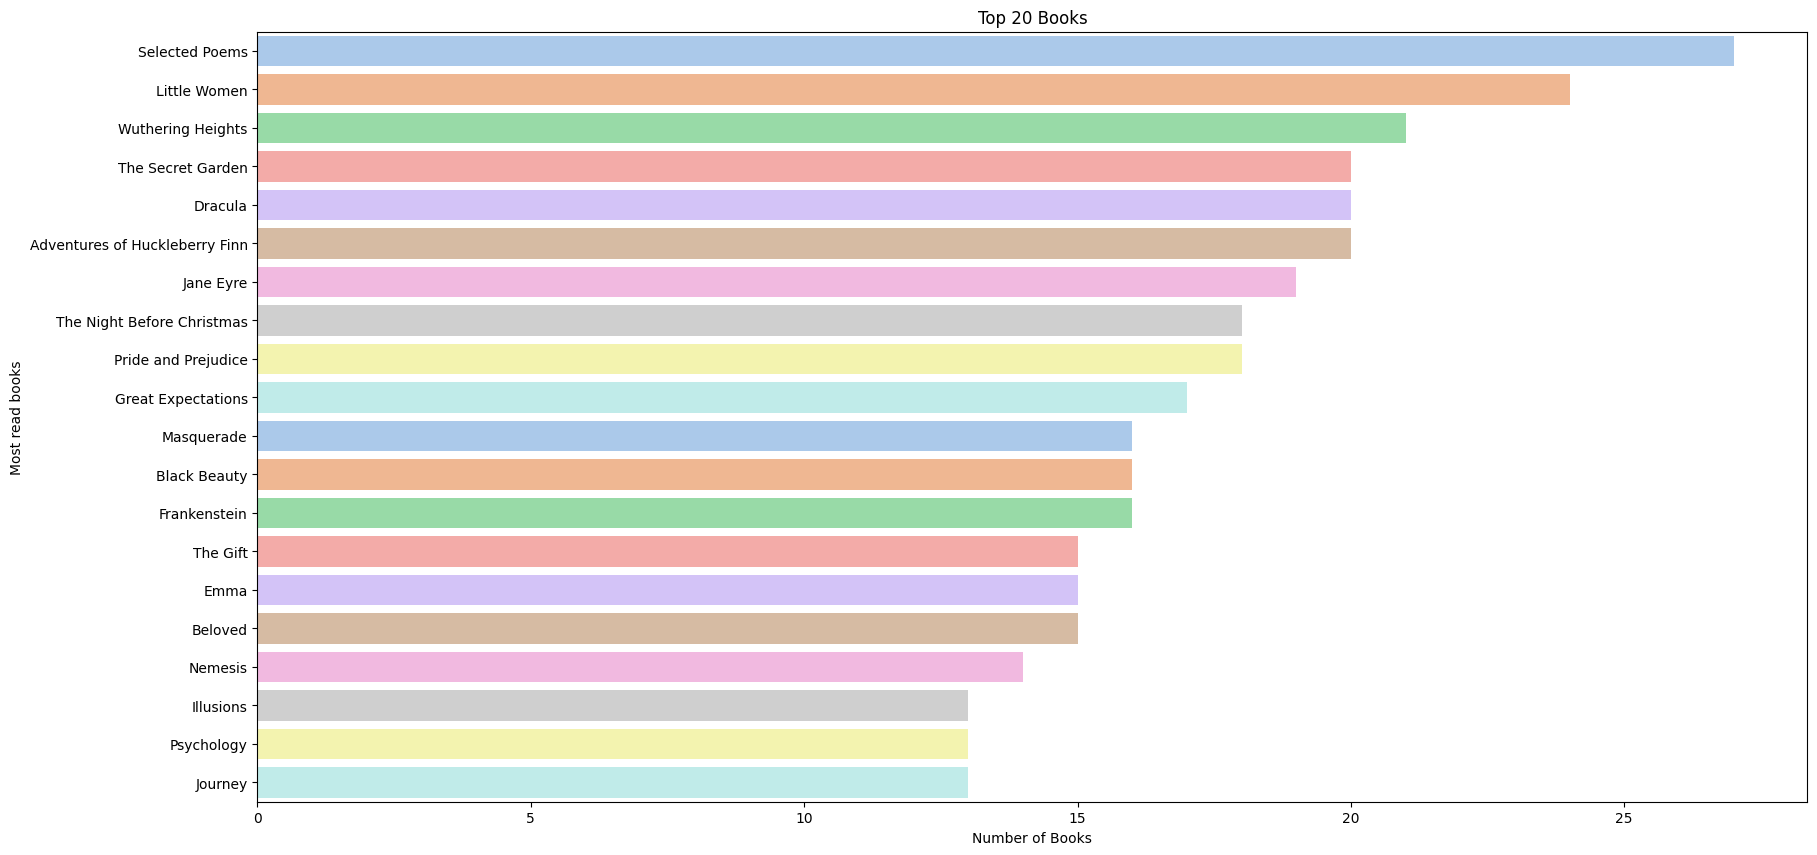

In [775]:
plt.figure(figsize=(20,10))
ax1=sns.countplot(y='book_title',data=books,order=pd.value_counts(books['book_title']).iloc[:20].index, palette="pastel")
ax1.set(xlabel='Number of Books', ylabel='Most read books')
plt.title('Top 20 Books')

/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/923591542.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ax1=sns.countplot(y='book_author',data=books,order=pd.value_counts(books['book_author']).iloc[:20].index, palette="pastel")
/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/923591542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1=sns.countplot(y='book_author',data=books,order=pd.value_counts(books['book_author']).iloc[:20].index, palette="pastel")


Text(0.5, 1.0, 'Top 20 Authors')

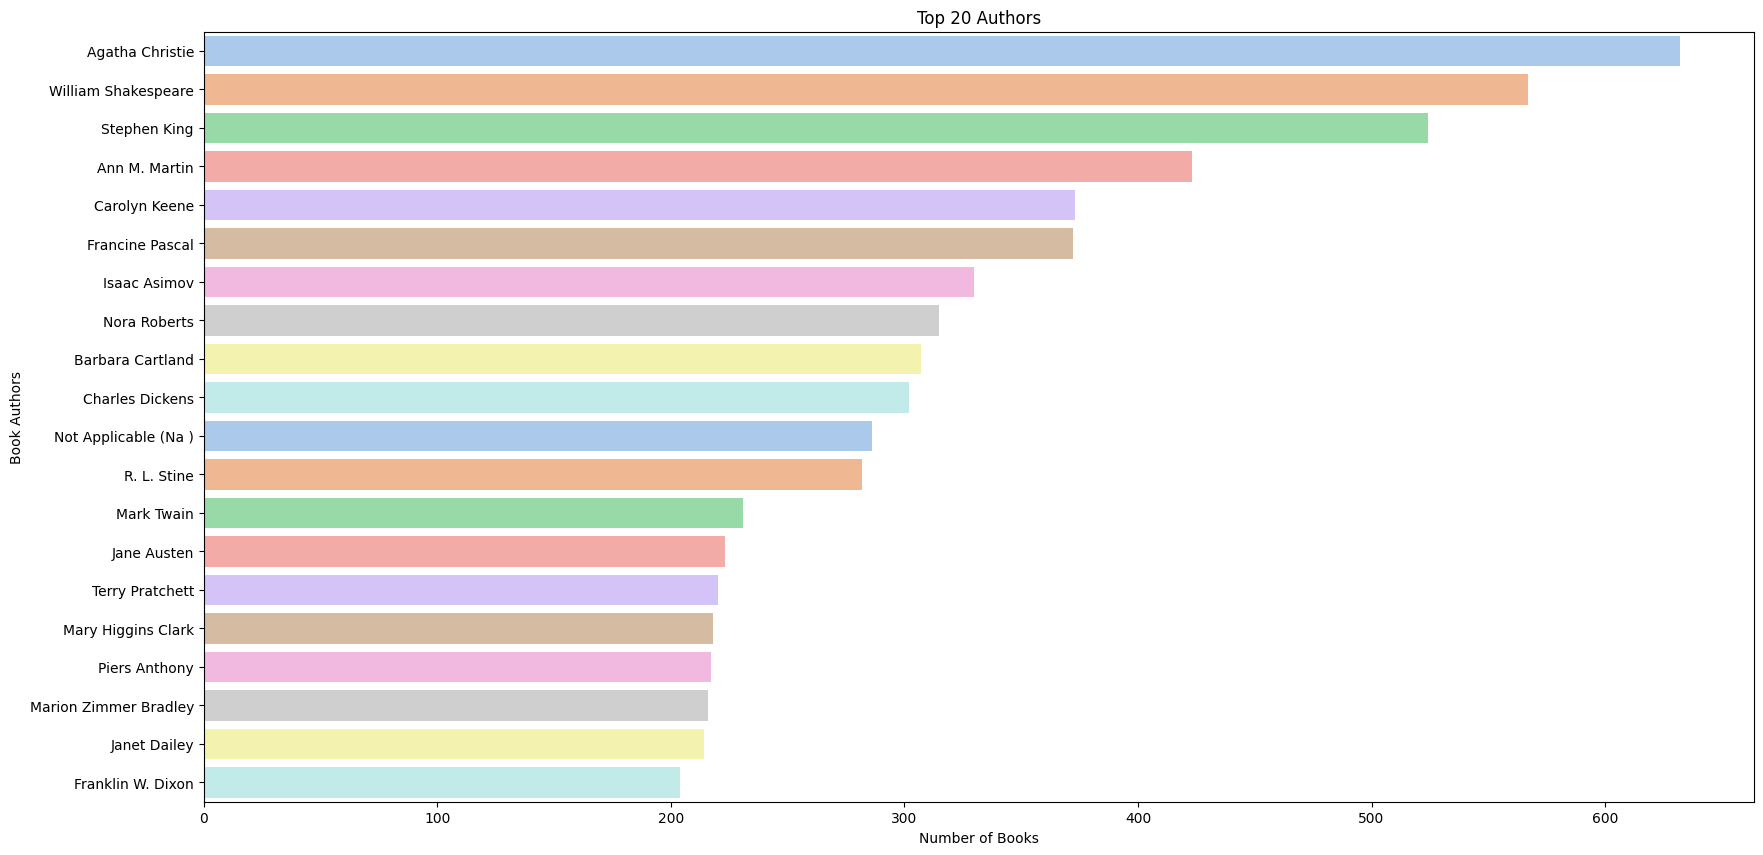

In [776]:
plt.figure(figsize=(20,10))
ax1=sns.countplot(y='book_author',data=books,order=pd.value_counts(books['book_author']).iloc[:20].index, palette="pastel")
ax1.set(xlabel='Number of Books', ylabel='Book Authors')
plt.title('Top 20 Authors')

/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/4089759687.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ax2=sns.countplot(y='publisher',data=books,order=pd.value_counts(books['publisher']).iloc[:20].index, palette="pastel")
/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/4089759687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2=sns.countplot(y='publisher',data=books,order=pd.value_counts(books['publisher']).iloc[:20].index, palette="pastel")


Text(0.5, 1.0, 'Top 20 Publishers')

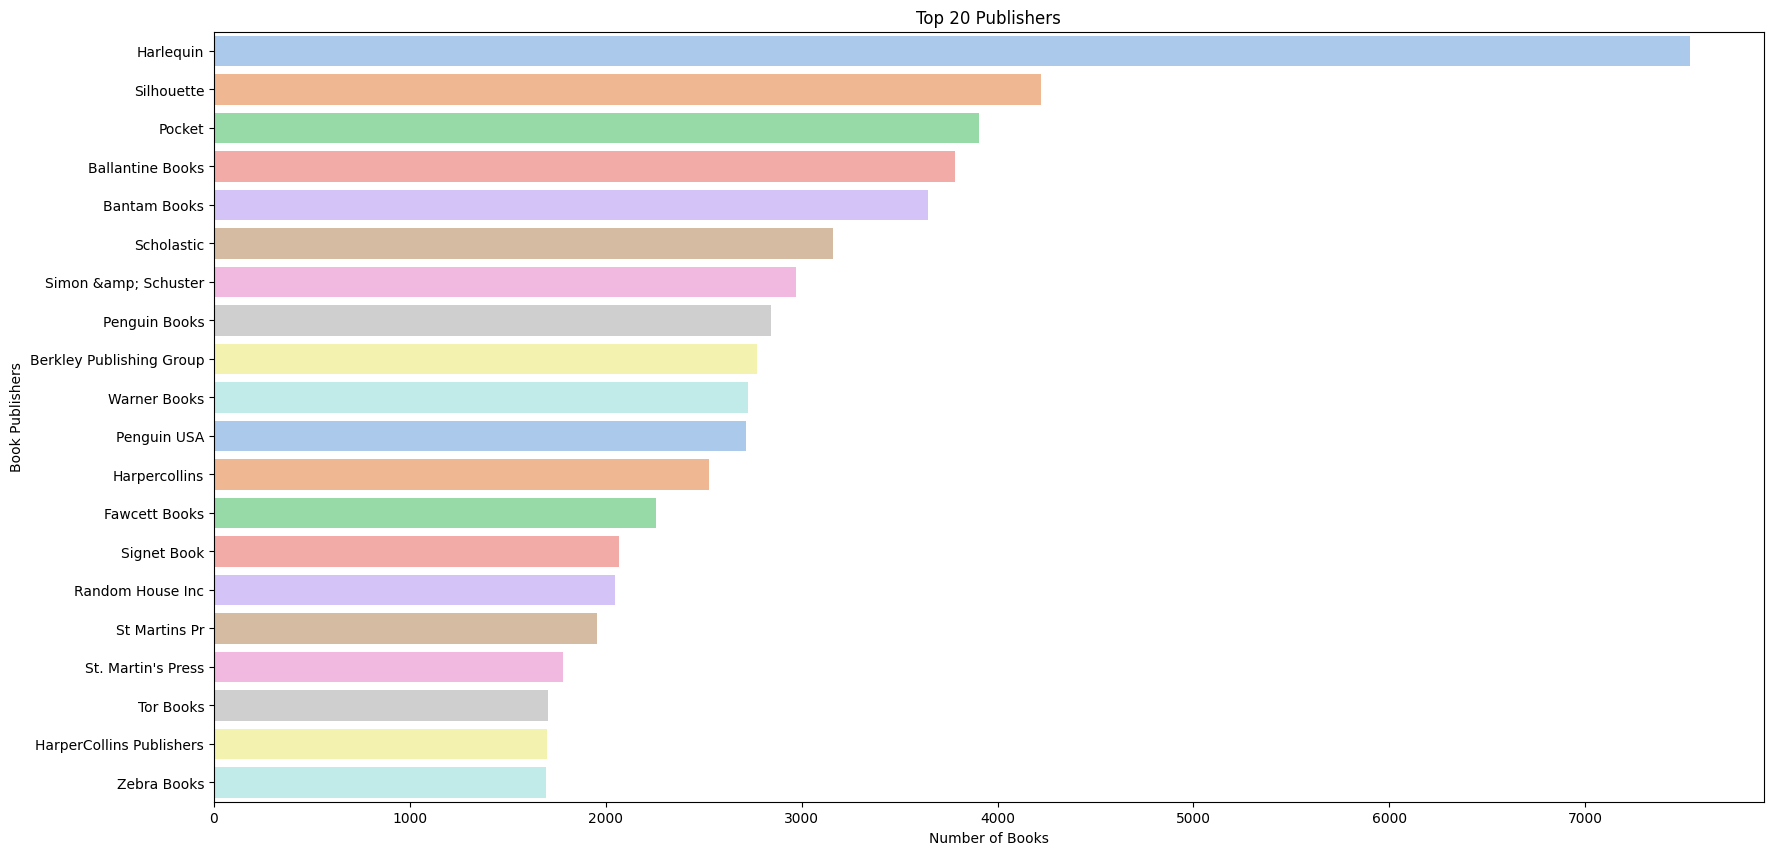

In [777]:
plt.figure(figsize=(20,10))
ax2=sns.countplot(y='publisher',data=books,order=pd.value_counts(books['publisher']).iloc[:20].index, palette="pastel")
ax2.set(xlabel='Number of Books', ylabel='Book Publishers')
plt.title('Top 20 Publishers')

/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/2829088962.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ax3=sns.countplot(y='location',data=users,order=pd.value_counts(users['location']).iloc[:20].index, palette="pastel")
/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/2829088962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax3=sns.countplot(y='location',data=users,order=pd.value_counts(users['location']).iloc[:20].index, palette="pastel")


Text(0.5, 1.0, 'Top 20 Locations')

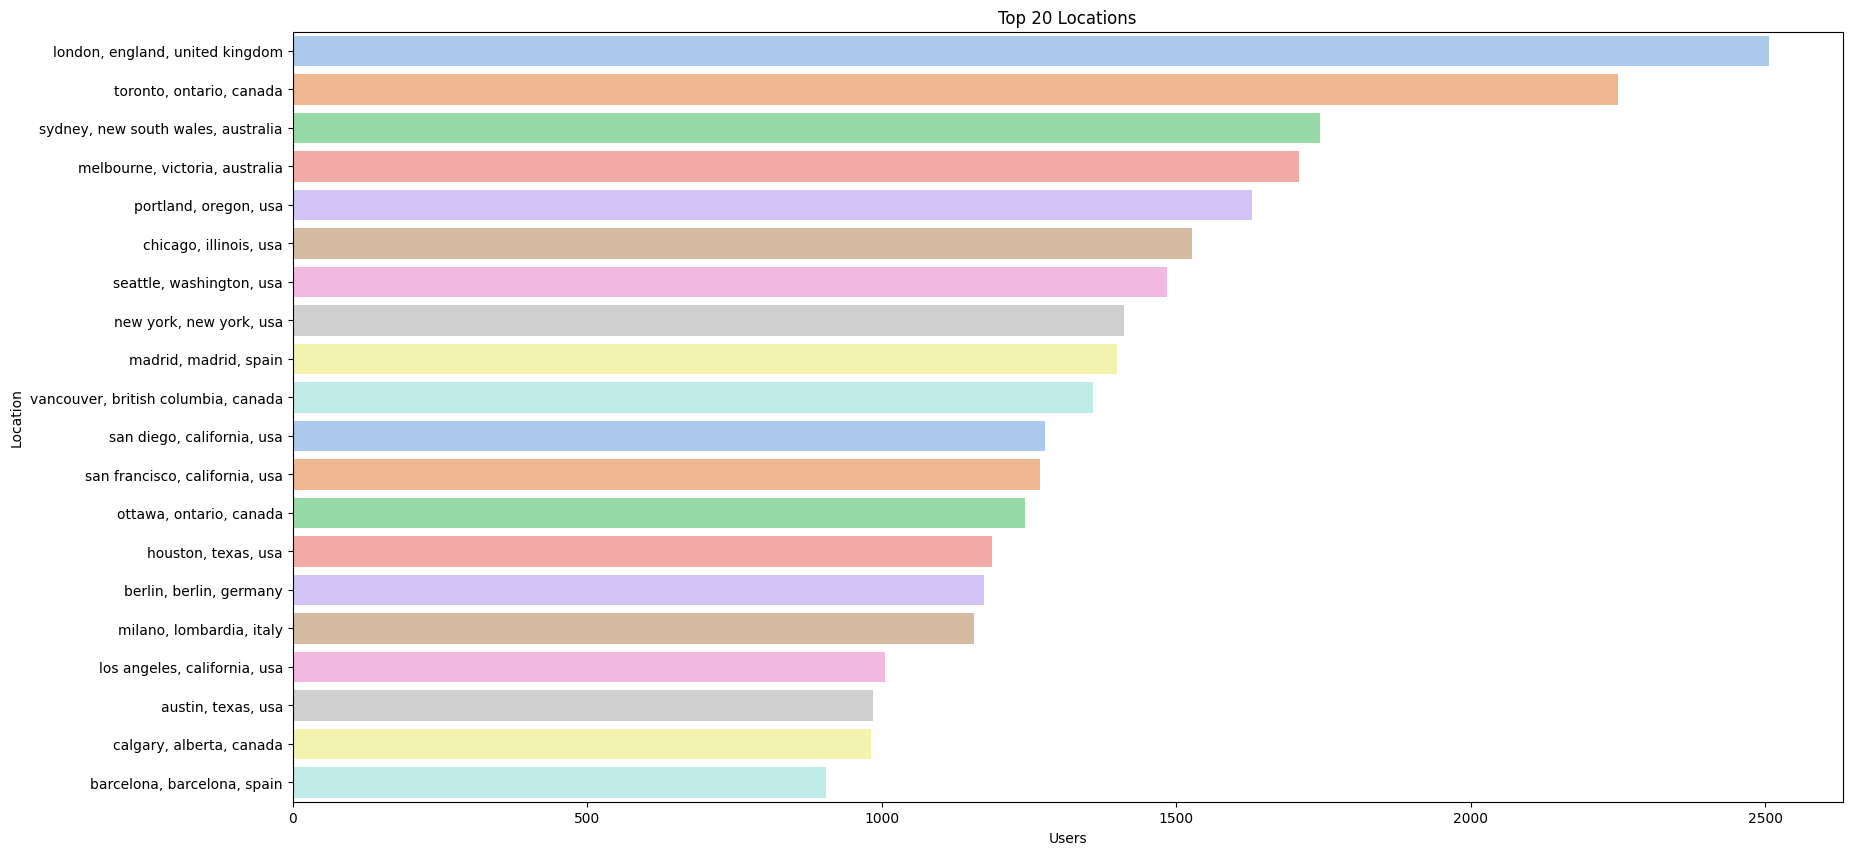

In [871]:
plt.figure(figsize=(20,10))
ax3=sns.countplot(y='location',data=users,order=pd.value_counts(users['location']).iloc[:20].index, palette="pastel")
ax3.set(xlabel='Users', ylabel='Location')
plt.title('Top 20 Locations')

In [779]:
books['year_of_publication'].value_counts(ascending=True)

year_of_publication
2037        1
2038        1
1934        1
2026        1
1917        1
        ...  
1998    15766
2000    17232
2001    17359
1999    17431
2002    17627
Name: count, Length: 118, dtype: int64

In [780]:
# Calculate value counts and sort in ascending order
year_count = books['year_of_publication'].value_counts().sort_values(ascending=True)

# Filter to show only years with counts less than 5
filtered_year_count = year_count[year_count < 5]
filtered_year_count

year_of_publication
2037                 1
1376                 1
1897                 1
1919                 1
1378                 1
2024                 1
2008                 1
Gallimard            1
1934                 1
2012                 1
1904                 1
1806                 1
1906                 1
1908                 1
1917                 1
2026                 1
2038                 1
1910                 1
1914                 1
2021                 1
1926                 2
1921                 2
2010                 2
1922                 2
1924                 2
1909                 2
2011                 2
2050                 2
1927                 2
1902                 2
1925                 2
1928                 2
DK Publishing Inc    2
2020                 3
2006                 3
1935                 3
1900                 3
1931                 3
1933                 4
1944                 4
Name: count, dtype: int64

/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/4014101678.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_year_count_df, x='year_of_publication', y='count', palette='pastel')


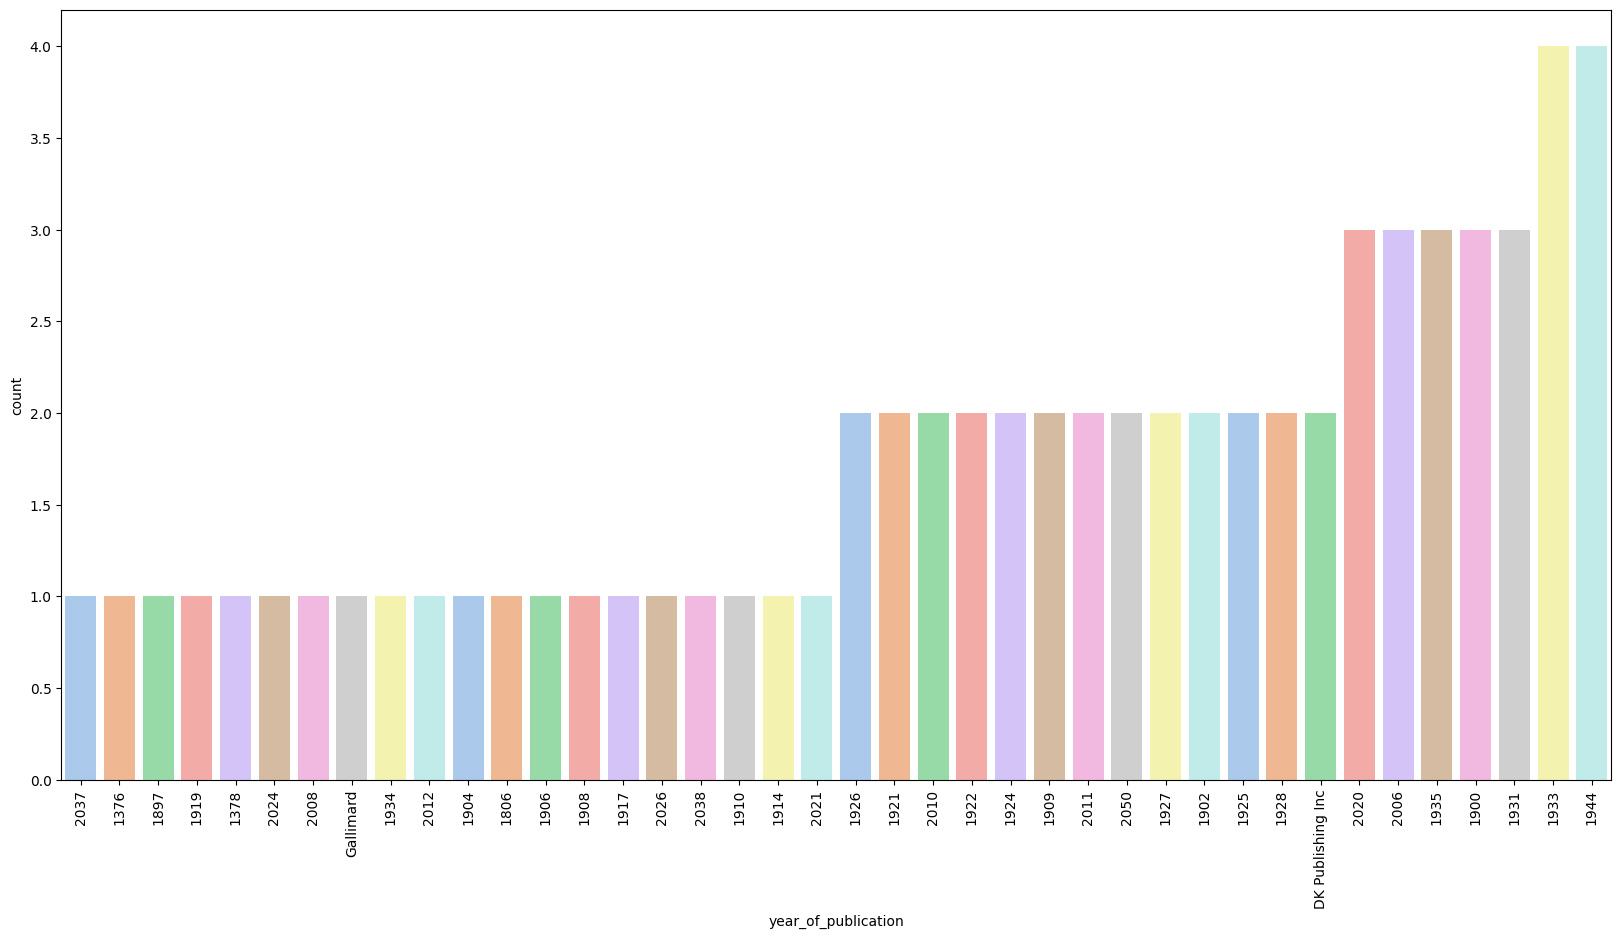

In [781]:
#Years with less than 5 books
# Convert the filtered series to a DataFrame for easier plotting
filtered_year_count_df = filtered_year_count.reset_index()
filtered_year_count_df.columns = ['year_of_publication', 'count']

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a bar plot
sns.barplot(data=filtered_year_count_df, x='year_of_publication', y='count', palette='pastel')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [782]:
#investigating the rows having 'DK Publishing Inc' as yearOfPublication
books.loc[books['year_of_publication'] == 'DK Publishing Inc',:]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,unknown
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,unknown


In [783]:
books.loc[books['year_of_publication'] == 'Gallimard',:]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,unknown


In [784]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.isbn == '2070426769','year_of_publication'] = 2003
books.loc[books.isbn == '2070426769','book_author'] = "Jean Marie Gustave Le Clezio"
books.loc[books.isbn == '2070426769','publisher'] = "Gallimard"
books.loc[books.isbn == '2070426769','book_title'] = "Peuple du ciel, suivi de Les Bergers"

#corrections done

In [785]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.isbn == '0789466953','year_of_publication'] = 2000
books.loc[books.isbn == '0789466953','book_author'] = "James Buckley"
books.loc[books.isbn == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.isbn == '0789466953','book_title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.isbn == '078946697X','year_of_publication'] = 2000
books.loc[books.isbn == '078946697X','book_author'] = "Michael Teitelbaum"
books.loc[books.isbn == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.isbn == '078946697X','book_title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books.loc[(books.isbn == '0789466953') | (books.isbn == '078946697X'),:]
#corrections done

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,unknown
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,unknown


In [786]:
books['year_of_publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 2000, 2003, '1909', '2008', '1378', '1919',
     

In [787]:
# Replace non-numeric years with NaN, then drop or fill them as needed
books['year_of_publication'] = pd.to_numeric(books['year_of_publication'], errors='coerce')

In [788]:
books['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/3038005278.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=books_sorted, x= "year_of_publication", palette='pastel')


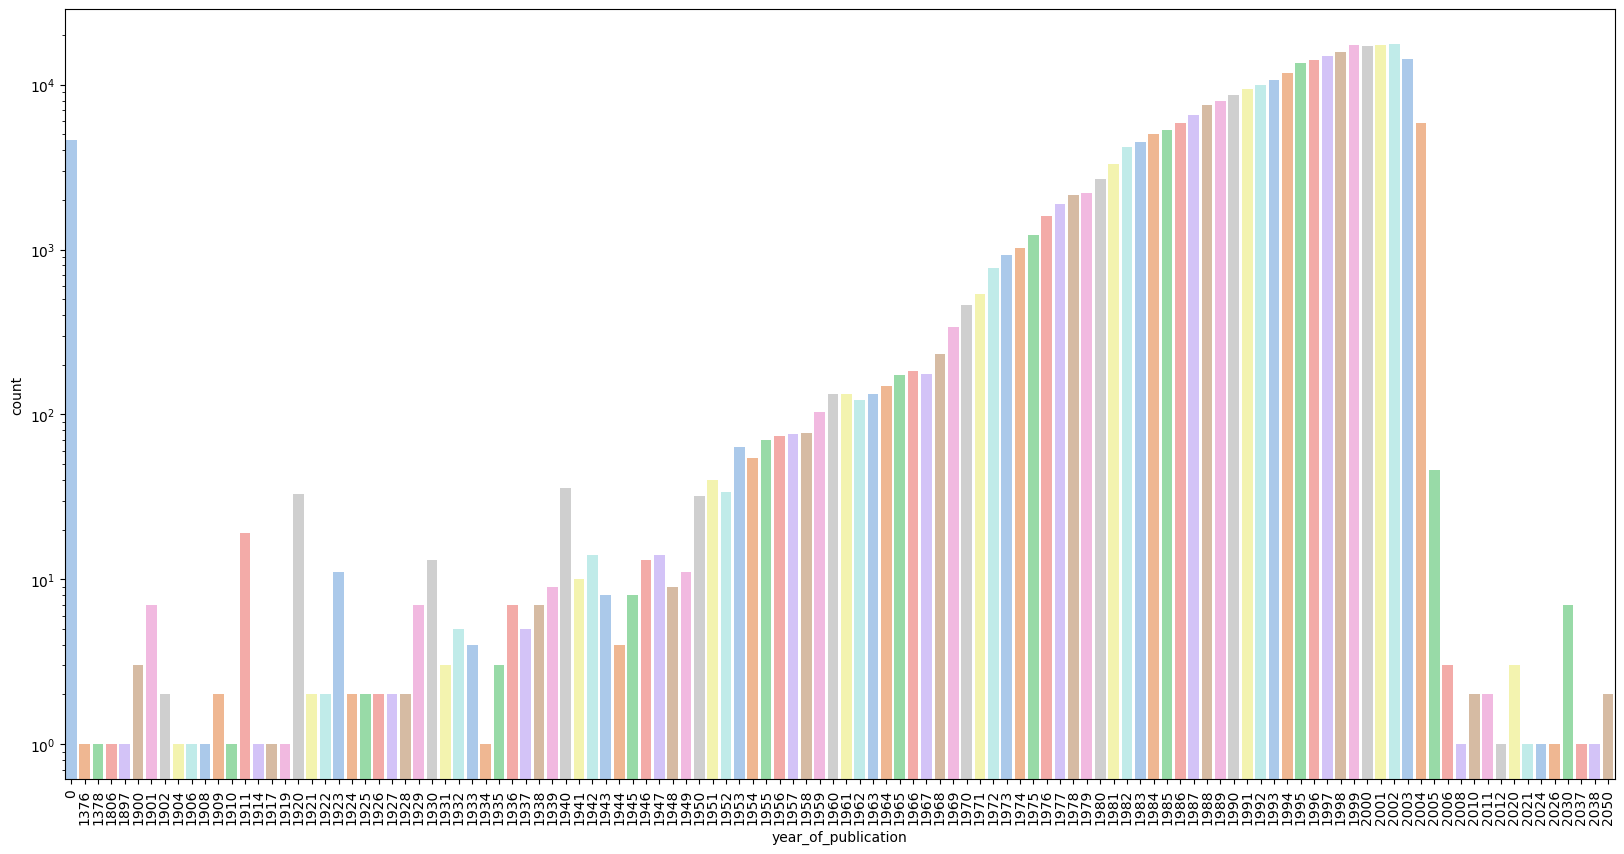

In [789]:
# Sort the DataFrame by 'year_of_publication' in ascending order
books_sorted = books.sort_values(by='year_of_publication', ascending=True)
# Set the figure size before creating the plot
plt.figure(figsize=(20, 10))
ax = sns.countplot(data=books_sorted, x= "year_of_publication", palette='pastel')
ax.set_yscale("log")
# Rotate the x-axis labels for better readability
plt.xticks(rotation=90);

/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/2376830477.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ax2=sns.countplot(y='year_of_publication',data=books,order=pd.value_counts(books['year_of_publication']).iloc[:20].index, palette="pastel")
/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/2376830477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2=sns.countplot(y='year_of_publication',data=books,order=pd.value_counts(books['year_of_publication']).iloc[:20].index, palette="pastel")


Text(0.5, 1.0, 'Top 20 Years of publishing')

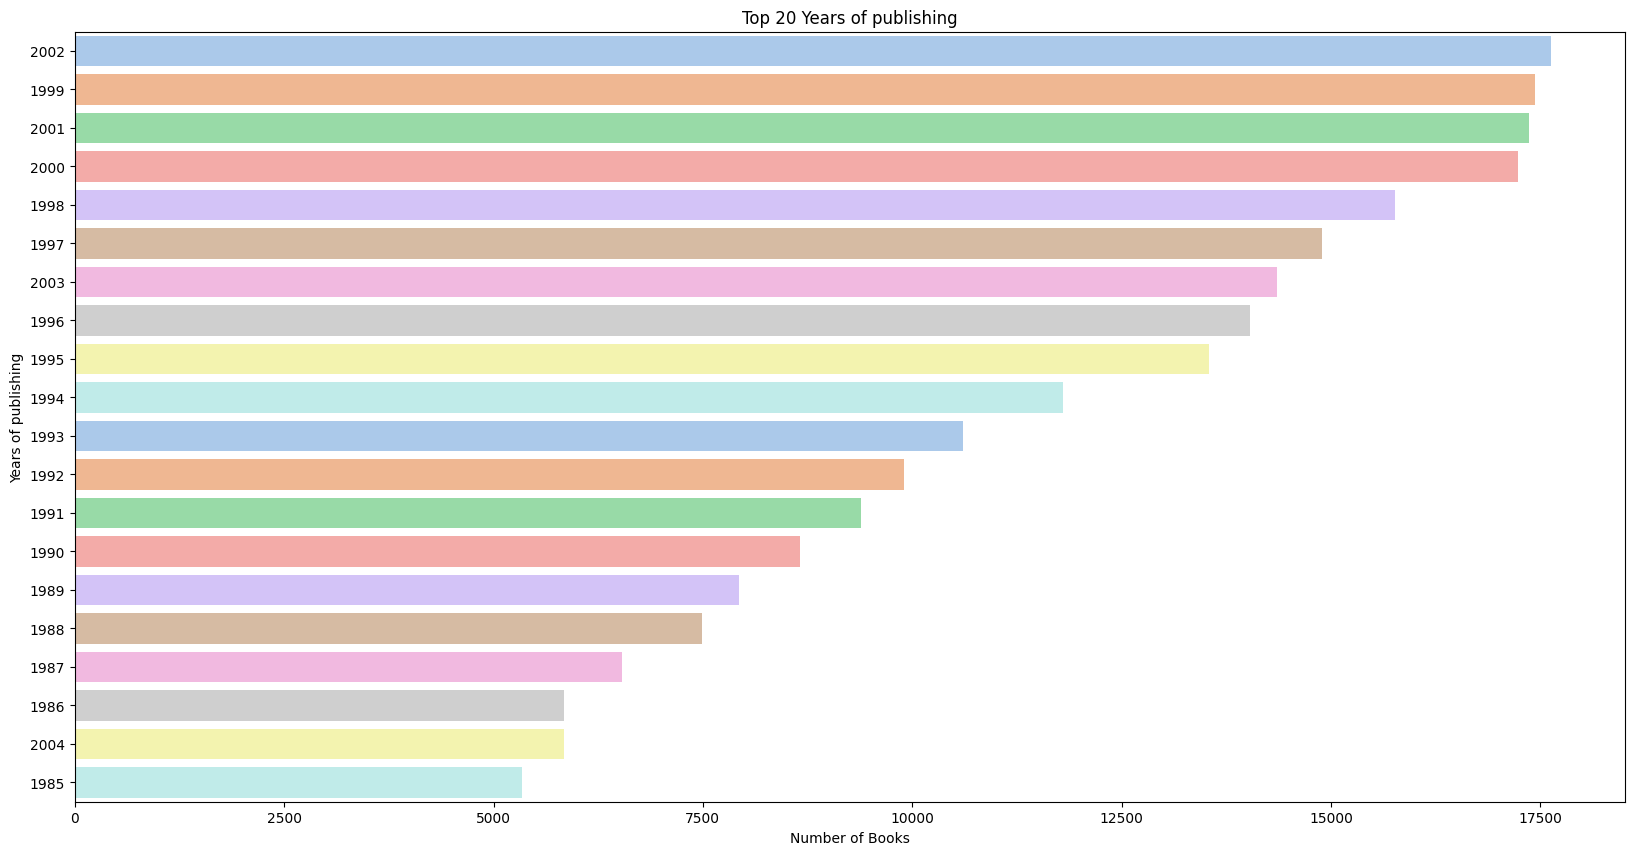

In [790]:
plt.figure(figsize=(20,10))
ax2=sns.countplot(y='year_of_publication',data=books,order=pd.value_counts(books['year_of_publication']).iloc[:20].index, palette="pastel")
ax2.set(xlabel='Number of Books', ylabel='Years of publishing')
plt.title('Top 20 Years of publishing')

In [791]:
books.loc[books['year_of_publication'] == '2007',:]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l


In [792]:
books.sort_values(by="isbn",ascending=True)

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
254249,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...
215806,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
42562,0001046438,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...
112555,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...
42604,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...
...,...,...,...,...,...,...,...,...
72805,B000234N76,Falling Angels,Tracy Chevalier,2001,E P Dutton,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...
193529,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002,Knopf,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...
131087,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan,0,Viking Adult,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...
179424,B0002JV9PY,The Blockade Runners,Jules Verne,0,Digireads.com,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...


In [793]:
books.nunique()['book_author']

102021

In [794]:
len(ratings['isbn'].unique())

340556

In [795]:
len(books['isbn'].unique())

271360

In [796]:
same_isbn=books['isbn'].isin(ratings['isbn']).sum()
same_isbn

270151

In [797]:
len(ratings['user_id'].unique())

105283

In [798]:
len(users['user_id'].unique())

278858

In [799]:
same_userid=users['user_id'].isin(ratings['user_id']).sum()
same_userid

105283

In [800]:
# Perform a left join on the 'isbn' column
booksratings = pd.merge(books, ratings, on='isbn', how='left')

# Display the first few rows of the merged DataFrame
booksratings.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0


In [801]:
booksratings.drop(["image_url_s", "image_url_m", "image_url_l" ], axis=1, inplace=True)

/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/934333229.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=booksratings_grouped, x="book_rating", palette='pastel');


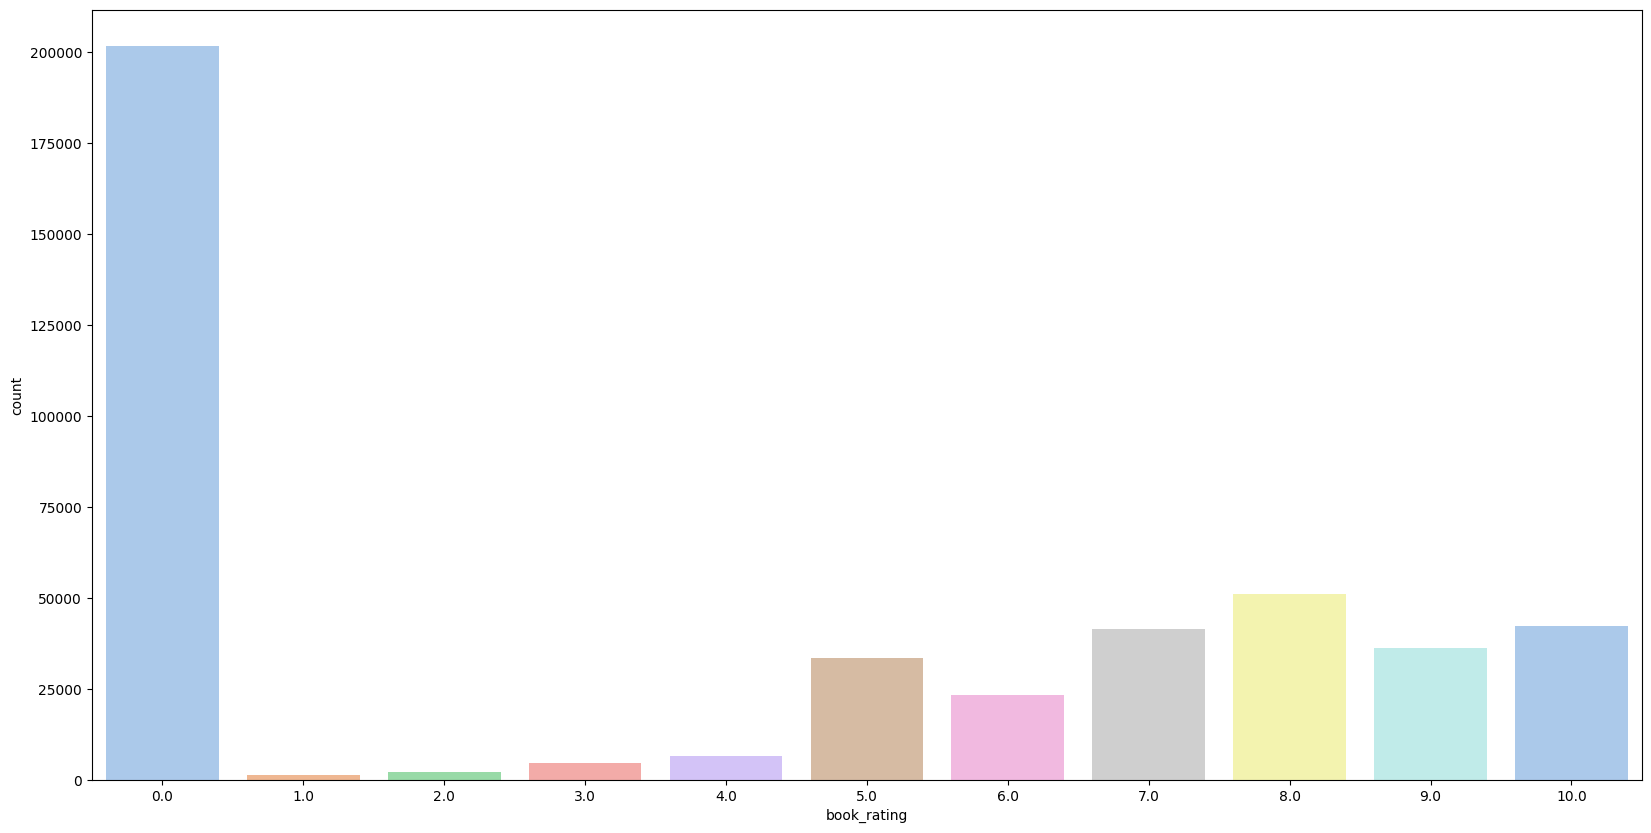

In [872]:
# Set the figure size before creating the plot
plt.figure(figsize=(20, 10))

# Checking which district has many fraudulent activities
booksratings_grouped = booksratings.groupby(["isbn", 'book_rating']).count().reset_index()

# Create the bar plot
sns.countplot(data=booksratings_grouped, x="book_rating", palette='pastel');

In [803]:
# Perform a left join on the 'isbn' column
all = pd.merge(booksratings, users, on='user_id', how='left')
all.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",unknown
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a",unknown
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,"sudbury, ontario, canada",unknown


In [804]:
print(f"Shape of booksratings: {booksratings.shape}")
print(f"Shape of users: {users.shape}")
print(f"Shape of merged DataFrame (all): {all.shape}")

Shape of booksratings: (1032345, 7)
Shape of users: (278858, 3)
Shape of merged DataFrame (all): (1032345, 9)


In [805]:
missing_users = all[all['user_id'].isna()]

In [806]:
missing_users

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age
65244,044990671X,Bronze Mirror,Jeanne Larsen,1992,Ballantine Books,NaN,NaN,NaN,NaN
65253,0929587081,Men and Brethren,James Gould Cozzens,1989,Elephant Paperbacks,NaN,NaN,NaN,NaN
65254,155970117X,"My Father, His Son",Reidar Jonsson,1991,Little Brown &amp; Co,NaN,NaN,NaN,NaN
65255,0688105408,Starlings Laughing: A Memoir of Africa,June Vendall Clark,1991,Harpercollins,NaN,NaN,NaN,NaN
124362,0671568485,The STAR TREK THE RETURN,William Shatner,1996,Audioworks,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1032326,1874166633,Introducing Nietzsche (Foundations in Children...,Laurence Gane,1998,Natl Book Network,NaN,NaN,NaN,NaN
1032327,0130897930,Core Web Programming (2nd Edition),Marty Hall,2001,Prentice Hall PTR,NaN,NaN,NaN,NaN
1032328,020130998X,The Unified Modeling Language Reference Manual...,James Rumbaugh,1998,Addison-Wesley Professional,NaN,NaN,NaN,NaN
1032329,2268032019,Petite histoire de la dÃ?Â©sinformation,Vladimir Volkoff,1999,Editions du Rocher,NaN,NaN,NaN,NaN


In [807]:
print(all.isna().sum())

isbn                      0
book_title                0
book_author               0
year_of_publication       0
publisher                 0
user_id                1209
book_rating            1209
location               1209
age                    1209
dtype: int64


In [808]:
# Drop rows with any NaN values in any column
all_cleaned = all.dropna()

# Alternatively, drop rows with NaN values only in specific columns
# all_cleaned = all.dropna(subset=['column1', 'column2'])

# Check the shape of the cleaned DataFrame
print(f"Shape before dropping NaNs: {all.shape}")
print(f"Shape after dropping NaNs: {all_cleaned.shape}")

# Display the first few rows of the cleaned DataFrame
print(all_cleaned.head())

Shape before dropping NaNs: (1032345, 9)
Shape after dropping NaNs: (1031136, 9)
         isbn           book_title           book_author  year_of_publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                 2002   
1  0002005018         Clara Callan  Richard Bruce Wright                 2001   
2  0002005018         Clara Callan  Richard Bruce Wright                 2001   
3  0002005018         Clara Callan  Richard Bruce Wright                 2001   
4  0002005018         Clara Callan  Richard Bruce Wright                 2001   

                 publisher  user_id  book_rating                   location  \
0  Oxford University Press      2.0          0.0  stockton, california, usa   
1    HarperFlamingo Canada      8.0          5.0   timmins, ontario, canada   
2    HarperFlamingo Canada  11400.0          0.0    ottawa, ontario, canada   
3    HarperFlamingo Canada  11676.0          8.0              n/a, n/a, n/a   
4    HarperFlamingo Canada  41385.0  

In [809]:
print(f"Shape of merged DataFrame (all): {all_cleaned.shape}")

Shape of merged DataFrame (all): (1031136, 9)


In [810]:
all_cleaned.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",unknown
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a",unknown
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,"sudbury, ontario, canada",unknown


In [811]:
missing_users = all_cleaned[all_cleaned['user_id'].isna()]
missing_users

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age


In [812]:
print(all_cleaned.isna().sum())

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
user_id                0
book_rating            0
location               0
age                    0
dtype: int64


In [813]:
all_cleaned[all_cleaned['book_rating'] == 0].shape 

(647294, 9)

In [814]:
print(all_cleaned['age'].isna().sum())

0


In [815]:
all_cleaned['age'].isna().sum()

0

In [816]:
# Step 1: Replace NaN values with 'unknown'
all_cleaned['age'] = all_cleaned['age'].fillna('Unknown')

# Step 2: Convert the 'age' column to numeric, coercing errors to NaN for non-numeric values like 'unknown'
all_cleaned['age_numeric'] = pd.to_numeric(all_cleaned['age'], errors='coerce')

# Step 3: Create age groups using the numeric age column, ignoring NaN values
bins = [-1, 12, 20, 50, 100, 250]
labels = ['Kid', 'Teenager', 'Adult', 'Mature', 'Super Mature']
all_cleaned['age_bins'] = pd.cut(all_cleaned['age_numeric'], bins=bins, labels=labels, right=False)

# Step 4: Handle 'unknown' explicitly
all_cleaned['age_bins'] = all_cleaned['age_bins'].astype(object)  # Ensure the bins are treated as object type (string)
all_cleaned['age_bins'][all_cleaned['age'] == 'unknown'] = 'unknown'

# Step 5: Convert the age_bins column to a categorical type with the desired order
all_cleaned['age_bins'] = pd.Categorical(all_cleaned['age_bins'], categories=labels + ['unknown'], ordered=True);

/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/2887890259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cleaned['age'] = all_cleaned['age'].fillna('Unknown')
/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/2887890259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cleaned['age_numeric'] = pd.to_numeric(all_cleaned['age'], errors='coerce')
/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/2887890259.py:10: SettingWithCopyWarning: 
A value is

In [817]:
all_cleaned["age"].unique()

array([18.0, 'unknown', 49.0, 30.0, 36.0, 29.0, 60.0, 27.0, 71.0, 40.0,
       53.0, 65.0, 46.0, 47.0, 26.0, 56.0, 37.0, 39.0, 25.0, 31.0, 41.0,
       20.0, 58.0, 42.0, 38.0, 52.0, 21.0, 22.0, 34.0, 33.0, 19.0, 57.0,
       51.0, 48.0, 35.0, 32.0, 62.0, 45.0, 74.0, 44.0, 43.0, 68.0, 54.0,
       55.0, 24.0, 59.0, 28.0, 70.0, 17.0, 23.0, 14.0, 50.0, 16.0, 61.0,
       15.0, 66.0, 67.0, 116.0, 84.0, 82.0, 9.0, 72.0, 81.0, 64.0, 13.0,
       75.0, 76.0, 128.0, 69.0, 73.0, 104.0, 63.0, 0.0, 77.0, 79.0, 7.0,
       239.0, 103.0, 12.0, 201.0, 204.0, 90.0, 80.0, 2.0, 85.0, 3.0, 1.0,
       4.0, 78.0, 83.0, 151.0, 8.0, 100.0, 148.0, 93.0, 11.0, 209.0, 10.0,
       147.0, 101.0, 168.0, 152.0, 133.0, 97.0, 5.0, 136.0, 86.0, 99.0,
       92.0, 228.0, 141.0, 237.0, 108.0, 96.0, 146.0, 140.0, 223.0, 219.0,
       124.0, 94.0, 200.0, 220.0, 244.0, 212.0, 157.0, 229.0, 105.0, 6.0,
       199.0, 226.0, 123.0, 118.0, 127.0, 114.0, 156.0, 138.0, 109.0,
       89.0, 95.0, 132.0, 107.0, 98.0], dtype=obje

In [818]:
# Check the distribution of ages across the age bins
age_bins_distribution = all_cleaned['age_bins'].value_counts(sort=False)

# Display the counts for each age bin
print(age_bins_distribution)

age_bins
Kid               5383
Teenager         30936
Adult           586342
Mature          127614
Super Mature      3026
unknown         277835
Name: count, dtype: int64


/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/2458937589.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cleaned['age_bins'] = pd.Categorical(all_cleaned['age_bins'], categories=age_bins_order, ordered=True)
/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/2458937589.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=all_cleaned, x='age_bins', palette='pastel', order=age_bins_order)


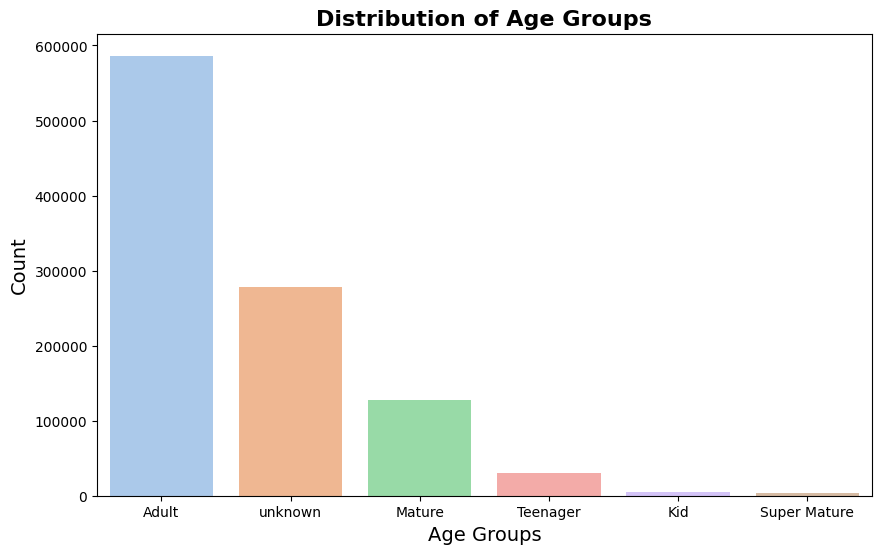

In [819]:
# Step 1: Calculate the frequency of each category in age_bins
age_bins_order = all_cleaned['age_bins'].value_counts().index

# Step 2: Convert age_bins to a categorical type with the new order
all_cleaned['age_bins'] = pd.Categorical(all_cleaned['age_bins'], categories=age_bins_order, ordered=True)

# Step 3: Plot the data
plt.figure(figsize=(10, 6))

# Create a count plot for the age_bins with descending order
sns.countplot(data=all_cleaned, x='age_bins', palette='pastel', order=age_bins_order)

# Set the title and labels
plt.title('Distribution of Age Groups', fontsize=16, fontweight='bold')
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()

In [820]:
import re

In [821]:
def clean_text_column(df, column_name):
    """
    Clean a specified text column in the DataFrame by:
    1. Removing leading numbers in the title.
    2. Removing special characters.
    3. Converting text to lowercase.
    4. Replacing multiple whitespace characters with a single space.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the column.
    - column_name (str): The name of the column to be cleaned.

    Returns:
    - pd.DataFrame: The DataFrame with the specified column updated.
    """
    # Remove leading numbers followed by a space
    df.loc[:, f"mod_{column_name}"] = df[column_name].str.replace(r'^\d+\s+', '', regex=True)
    
    # Remove special characters
    df.loc[:, f"mod_{column_name}"] = df[f"mod_{column_name}"].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
    
    # Convert to lowercase
    df.loc[:, f"mod_{column_name}"] = df[f"mod_{column_name}"].str.lower()
    
    # Replace multiple spaces with a single space
    df.loc[:, f"mod_{column_name}"] = df[f"mod_{column_name}"].str.replace(r'\s+', ' ', regex=True).str.strip()
    
    return df

In [873]:
clean_text_column(all_cleaned, 'book_author');
clean_text_column(all_cleaned, 'book_title');
clean_text_column(all_cleaned, 'publisher');

In [823]:
all_cleaned.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age,age_numeric,age_bins,mod_book_author,mod_book_title,mod_publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0,18.0,Teenager,mark p o morford,classical mythology,oxford university press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0,49.0,Adult,richard bruce wright,clara callan,harperflamingo canada
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,"sudbury, ontario, canada",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada


In [824]:
#no empty raw 
all_cleaned = all_cleaned[all_cleaned["mod_publisher"].str.len() > 0]
all_cleaned = all_cleaned[all_cleaned["mod_book_author"].str.len() > 0]
all_cleaned = all_cleaned[all_cleaned["mod_book_title"].str.len() > 0]

### Authors Rating 

In [825]:
# Group by both 'mod_book_author' and 'mod_book_title' columns
author_ratings = all_cleaned.groupby(['mod_book_author'])['book_rating'].count().sort_values(ascending=False).reset_index()

In [826]:
print(type(author_ratings))
print(author_ratings.head())

<class 'pandas.core.frame.DataFrame'>
   mod_book_author  book_rating
0     stephen king        10179
1     john grisham         8818
2     nora roberts         8590
3  james patterson         5845
4   danielle steel         5065


/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/1121056078.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax5 = sns.barplot(x='mod_book_author', y='book_rating', data=filtered_data,palette='pastel')


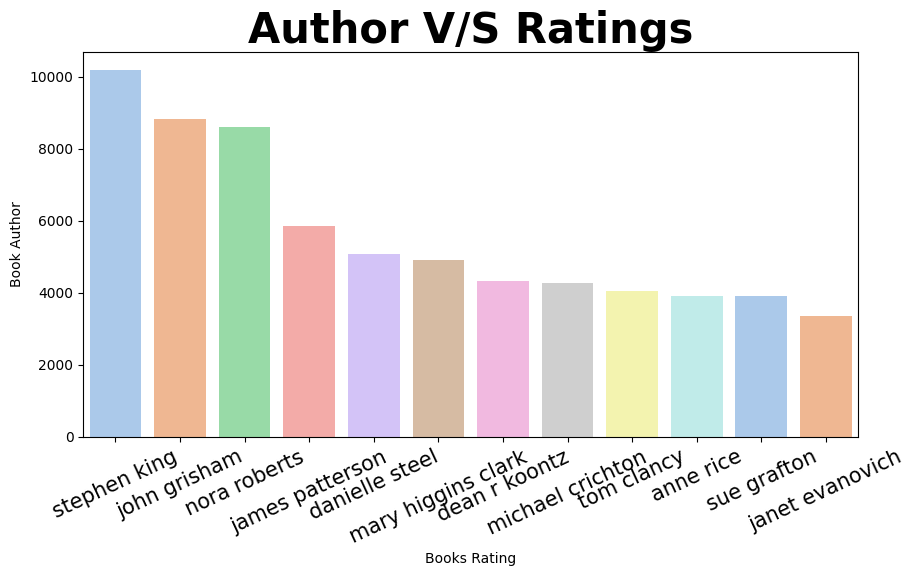

In [874]:
plt.figure(figsize=(10, 5))

# Filter the data for authors with book ratings greater than 3000
filtered_data = author_ratings[author_ratings['book_rating'] > 3000]

# Create the bar plot using the x and y keyword arguments
ax5 = sns.barplot(x='mod_book_author', y='book_rating', data=filtered_data,palette='pastel')

# Set the title and adjust the x-axis labels
ax5.set_title('Author V/S Ratings', fontsize=30, fontweight='bold')
ax5.set(xlabel='Books Rating', ylabel='Book Author')
plt.xticks(fontsize=15, rotation=25)

# Display the plot
plt.show()

In [828]:
#check if in the "weird" ages theres actual data 
all_cleaned['age'].unique()

array([18.0, 'unknown', 49.0, 30.0, 36.0, 29.0, 60.0, 27.0, 71.0, 40.0,
       53.0, 65.0, 46.0, 47.0, 26.0, 56.0, 37.0, 39.0, 25.0, 31.0, 41.0,
       20.0, 58.0, 42.0, 38.0, 52.0, 21.0, 22.0, 34.0, 33.0, 19.0, 57.0,
       51.0, 48.0, 35.0, 32.0, 62.0, 45.0, 74.0, 44.0, 43.0, 68.0, 54.0,
       55.0, 24.0, 59.0, 28.0, 70.0, 17.0, 23.0, 14.0, 50.0, 16.0, 61.0,
       15.0, 66.0, 67.0, 116.0, 84.0, 82.0, 9.0, 72.0, 81.0, 64.0, 13.0,
       75.0, 76.0, 128.0, 69.0, 73.0, 104.0, 63.0, 0.0, 77.0, 79.0, 7.0,
       239.0, 103.0, 12.0, 201.0, 204.0, 90.0, 80.0, 2.0, 85.0, 3.0, 1.0,
       4.0, 78.0, 83.0, 151.0, 8.0, 100.0, 148.0, 93.0, 11.0, 209.0, 10.0,
       147.0, 101.0, 168.0, 152.0, 133.0, 97.0, 5.0, 136.0, 86.0, 99.0,
       92.0, 228.0, 141.0, 237.0, 108.0, 96.0, 146.0, 140.0, 223.0, 219.0,
       124.0, 94.0, 200.0, 220.0, 244.0, 212.0, 157.0, 229.0, 105.0, 6.0,
       199.0, 226.0, 123.0, 118.0, 127.0, 114.0, 156.0, 138.0, 109.0,
       89.0, 95.0, 132.0, 107.0, 98.0], dtype=obje

In [829]:
print(all_cleaned['age'].dtype)

object


In [830]:
all_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031136 entries, 0 to 1032344
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   isbn                 1031136 non-null  object  
 1   book_title           1031136 non-null  object  
 2   book_author          1031136 non-null  object  
 3   year_of_publication  1031136 non-null  int64   
 4   publisher            1031136 non-null  object  
 5   user_id              1031136 non-null  float64 
 6   book_rating          1031136 non-null  float64 
 7   location             1031136 non-null  object  
 8   age                  1031136 non-null  object  
 9   age_numeric          753301 non-null   float64 
 10  age_bins             1031136 non-null  category
 11  mod_book_author      1031136 non-null  object  
 12  mod_book_title       1031136 non-null  object  
 13  mod_publisher        1031136 non-null  object  
dtypes: category(1), float64(3), int64(1), o

### Books rating

In [831]:
max_ratings = all_cleaned.groupby('mod_book_title')['book_rating'].max().reset_index()

max_ratings_sorted = max_ratings.sort_values(by='book_rating', ascending=False)

best_books = max_ratings_sorted.iloc[:10]  

print(f"Best Books: {best_books['mod_book_title']}, Rating: {best_books['book_rating']}")

Best Books: 0                           006781 bk1 gags de boule et bil
85792                                     i is for innocent
152423                                         see jane run
192540                the maiden of mayfair tales of london
108045    lost empires being richard hercastles account ...
29560                                   carusos caricatures
85793           i is for innocent a kinsey millhone mystery
212185    this bridge called my back writings by radical...
192543                                  the maidens bequest
212184                              this boys life a memoir
Name: mod_book_title, dtype: object, Rating: 0         10.0
85792     10.0
152423    10.0
192540    10.0
108045    10.0
29560     10.0
85793     10.0
212185    10.0
192543    10.0
212184    10.0
Name: book_rating, dtype: float64


/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/2427748496.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_books, x='book_rating', y='mod_book_title', palette='pastel')


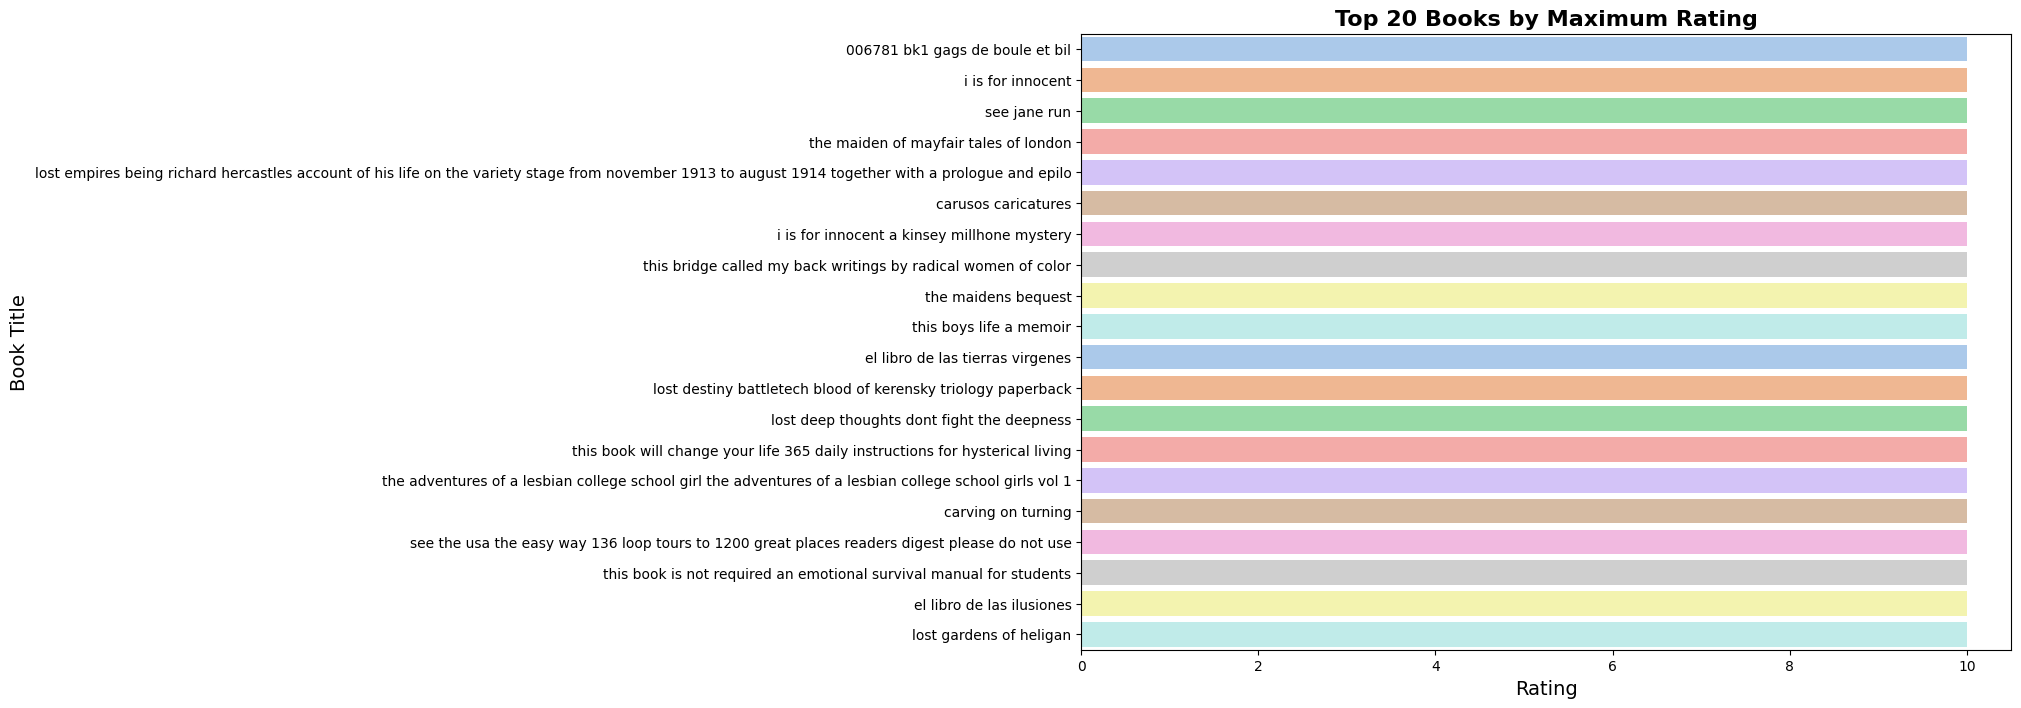

In [832]:
# Step 1: Group by 'mod_book_title' and find the maximum rating
max_ratings = all_cleaned.groupby('mod_book_title')['book_rating'].max().reset_index()

# Step 2: Sort the grouped data by rating in descending order
max_ratings_sorted = max_ratings.sort_values(by='book_rating', ascending=False)

# Step 3: Extract the top 10 books with the highest ratings
best_books = max_ratings_sorted.iloc[:20]

# Step 4: Plot the data
plt.figure(figsize=(12, 8))

# Create a bar plot with book titles and ratings
sns.barplot(data=best_books, x='book_rating', y='mod_book_title', palette='pastel')

# Add titles and labels
plt.title('Top 20 Books by Maximum Rating', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Book Title', fontsize=14)

# Display the plot
plt.show();

In [833]:
# Access the specific row in the DataFrame where 'mod_book_title' matches the given string
specific_row = all_cleaned[all_cleaned['mod_book_title'] == '006781 bk1 gags de boule et bil']

# Display the row
specific_row

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age,age_numeric,age_bins,mod_book_author,mod_book_title,mod_publisher
584880,2266022253,006781: Bk.1 Gags De Boule Et Bil,ROBA,0,Pocket,274111.0,10.0,"massagno, ticino, switzerland",unknown,NaN,unknown,roba,006781 bk1 gags de boule et bil,pocket


In [834]:
# Filter rows where the title contains numbers
rows_with_numbers_before_title = all_cleaned[all_cleaned['mod_book_title'].str.contains(r'^\d+', regex=True)]

# Display the filtered rows
rows_with_numbers_before_title

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age,age_numeric,age_bins,mod_book_author,mod_book_title,mod_publisher
33486,0786015276,11th Hour,Bradley Warshauer,2003,Pinnacle Books,487.0,0.0,"houston, texas, usa",unknown,NaN,unknown,bradley warshauer,11th hour,pinnacle books
33487,0786015276,11th Hour,Bradley Warshauer,2003,Pinnacle Books,35859.0,0.0,"duluth, minnesota, usa",unknown,NaN,unknown,bradley warshauer,11th hour,pinnacle books
44433,0316693200,2nd Chance,James Patterson,2002,"Little, Brown",277523.0,10.0,"woodstock, virginia, usa",62.0,62.0,Mature,james patterson,2nd chance,little brown
44434,0316693200,2nd Chance,James Patterson,2002,"Little, Brown",638.0,9.0,"san diego, california, usa",20.0,20.0,Adult,james patterson,2nd chance,little brown
44435,0316693200,2nd Chance,James Patterson,2002,"Little, Brown",5815.0,9.0,"rockville, maryland, usa",unknown,NaN,unknown,james patterson,2nd chance,little brown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030340,0740709895,"1,003 Great Things About Teachers",Lisa Birnbach,2000,Andrews McMeel Publishing,241033.0,3.0,"columbus, ohio, usa",26.0,26.0,Adult,lisa birnbach,1003 great things about teachers,andrews mcmeel publishing
1030353,0582060184,1984,George Orwell,1991,Longman Publishing Group,241202.0,0.0,"nuneaton, england, united kingdom",19.0,19.0,Teenager,george orwell,1984,longman publishing group
1030683,0892210397,2nd Fiddle,Harrison&amp;,1979,New Leaf Pr,242106.0,0.0,"covington, virginia, usa",28.0,28.0,Adult,harrisonamp,2nd fiddle,new leaf pr
1030849,0785335064,5-Minute Fairy Tales,Jane Jerrard,2001,"Publications, International, Ltd.",242445.0,0.0,"vancouver, british columbia, canada",24.0,24.0,Adult,jane jerrard,5minute fairy tales,publications international ltd


In [835]:
all_cleaned.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age,age_numeric,age_bins,mod_book_author,mod_book_title,mod_publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0,18.0,Teenager,mark p o morford,classical mythology,oxford university press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0,49.0,Adult,richard bruce wright,clara callan,harperflamingo canada
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,"sudbury, ontario, canada",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada


### Rating by location

In [836]:
all_cleaned['location'].nunique()

22480

In [837]:
# Identify rows with multiple consecutive spaces in the 'location' column
weird_spacing = all_cleaned[all_cleaned['location'].str.contains(r'\s{2,}', regex=True)]

# Also, identify rows with leading or trailing spaces in the 'location' column
leading_trailing_spaces = all_cleaned[all_cleaned['location'].str.contains(r'^\s+|\s+$', regex=True)]

# Combine both conditions
weird_location_data = pd.concat([weird_spacing, leading_trailing_spaces]).drop_duplicates()

# Display the rows with weird spacing
print(weird_location_data[['location']])

                                      location
265              saint  charles, missouri, usa
2843               couer d`  alene, idaho, usa
3157           san  francisco, california, usa
10380                 elk  city, oklahoma, usa
13394    hammonton, nj  08037, new jersey, usa
...                                        ...
1017172             cuyahoga  falls, ohio, usa
1030235               elk  city, oklahoma, usa
1030236               elk  city, oklahoma, usa
1030237               elk  city, oklahoma, usa
1030238               elk  city, oklahoma, usa

[355 rows x 1 columns]


In [838]:
def clean_location_spacing(df, column_name):
    """
    Clean weird spacing in the specified location column of the DataFrame.
    
    This function:
    1. Strips leading and trailing spaces.
    2. Replaces multiple spaces between words with a single space.
    3. Ensures that "City, State, Country" format is preserved.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the location data.
    - column_name (str): The name of the column to be cleaned.
    
    Returns:
    - pd.DataFrame: The DataFrame with the cleaned location column.
    """
    # Step 1: Remove leading and trailing spaces
    df[column_name] = df[column_name].str.strip()
    
    # Step 2: Replace multiple spaces with a single space
    df[column_name] = df[column_name].str.replace(r'\s+', ' ', regex=True)
    
    # Step 3: Ensure proper spacing around commas (",")
    df[column_name] = df[column_name].str.replace(r'\s*,\s*', ', ', regex=True)
    
    return df

# Apply the function to the 'location' column
all_cleaned = clean_location_spacing(all_cleaned, 'location')

# Display the cleaned locations
print(all_cleaned['location'].head())

0    stockton, california, usa
1     timmins, ontario, canada
2      ottawa, ontario, canada
3                n/a, n/a, n/a
4     sudbury, ontario, canada
Name: location, dtype: object


In [840]:
location_rating = all_cleaned.groupby('location')['book_rating'].max().reset_index()
sorted_location_rating = location_rating.sort_values(by = 'book_rating', ascending=False)
highest_rating_location = sorted_location_rating.iloc[:20]
print(f"Best Books: {highest_rating_location['location']}, Rating: {best_books['book_rating']}")

Best Books: 11223                  lochbuie, colorado, usa
9890                      kettering, ohio, usa
9898               key west, florida keys, usa
9899                    key west, florida, usa
9902                  keyport, new jersey, usa
9903                keyser, west virginia, usa
20617                    verdon, nebraska, usa
20614                    verbena, alabama, usa
9922         kiel, schleswig-holstein, germany
20611                 ventura, california, usa
20610                 ventnor, new jersey, usa
9928                      kilauea, hawaii, usa
9932                    kilkenny, n/a, ireland
9934     kill devil hills, north carolina, usa
9936                   killbuck, new york, usa
9938                       killeen, texas, usa
9939      kilmarnock, scotland, united kingdom
9941              kilmore, victoria, australia
20606                     venice, florida, usa
9897                              key west, , 
Name: location, dtype: object, Rating: 0        

/var/folders/pp/kcbw8ksn7g9_pjm4p84cj6ym0000gn/T/ipykernel_41564/91742061.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=highest_rating_location, x='book_rating', y='location', palette='pastel')


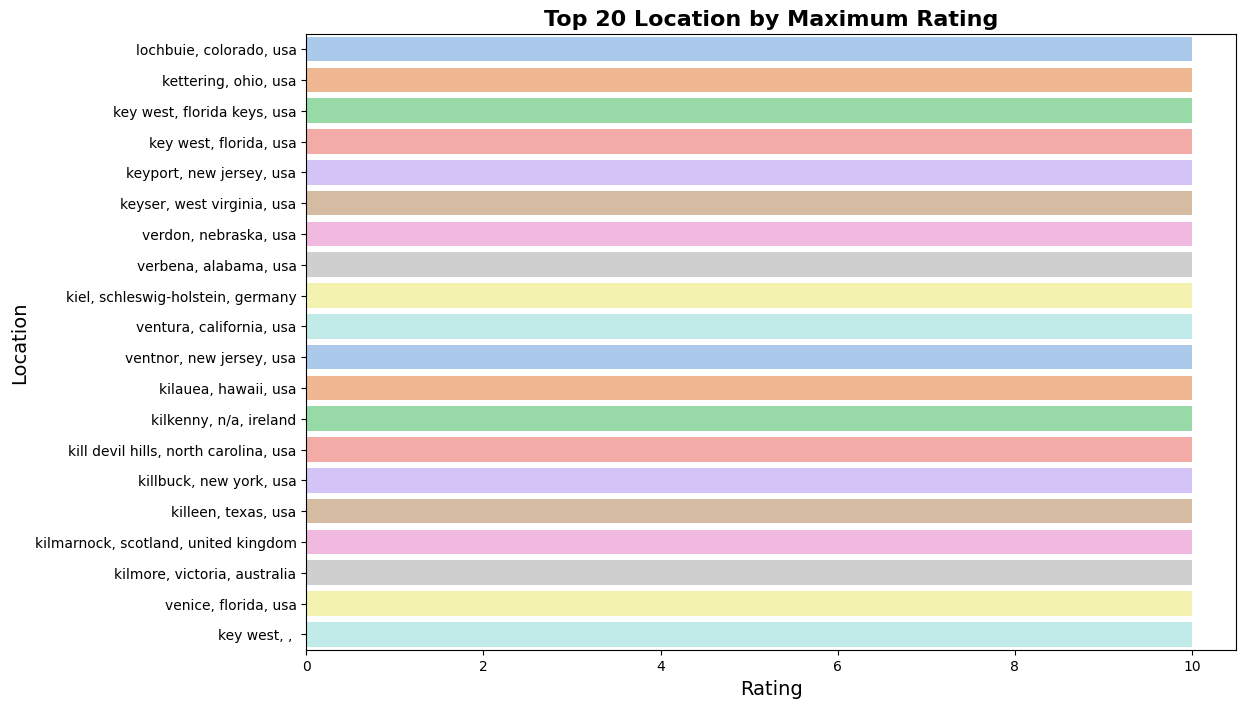

In [841]:
#Plot the data
plt.figure(figsize=(12, 8))

sns.barplot(data=highest_rating_location, x='book_rating', y='location', palette='pastel')

# Add titles and labels
plt.title('Top 20 Location by Maximum Rating', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Location', fontsize=14)

# Display the plot
plt.show();

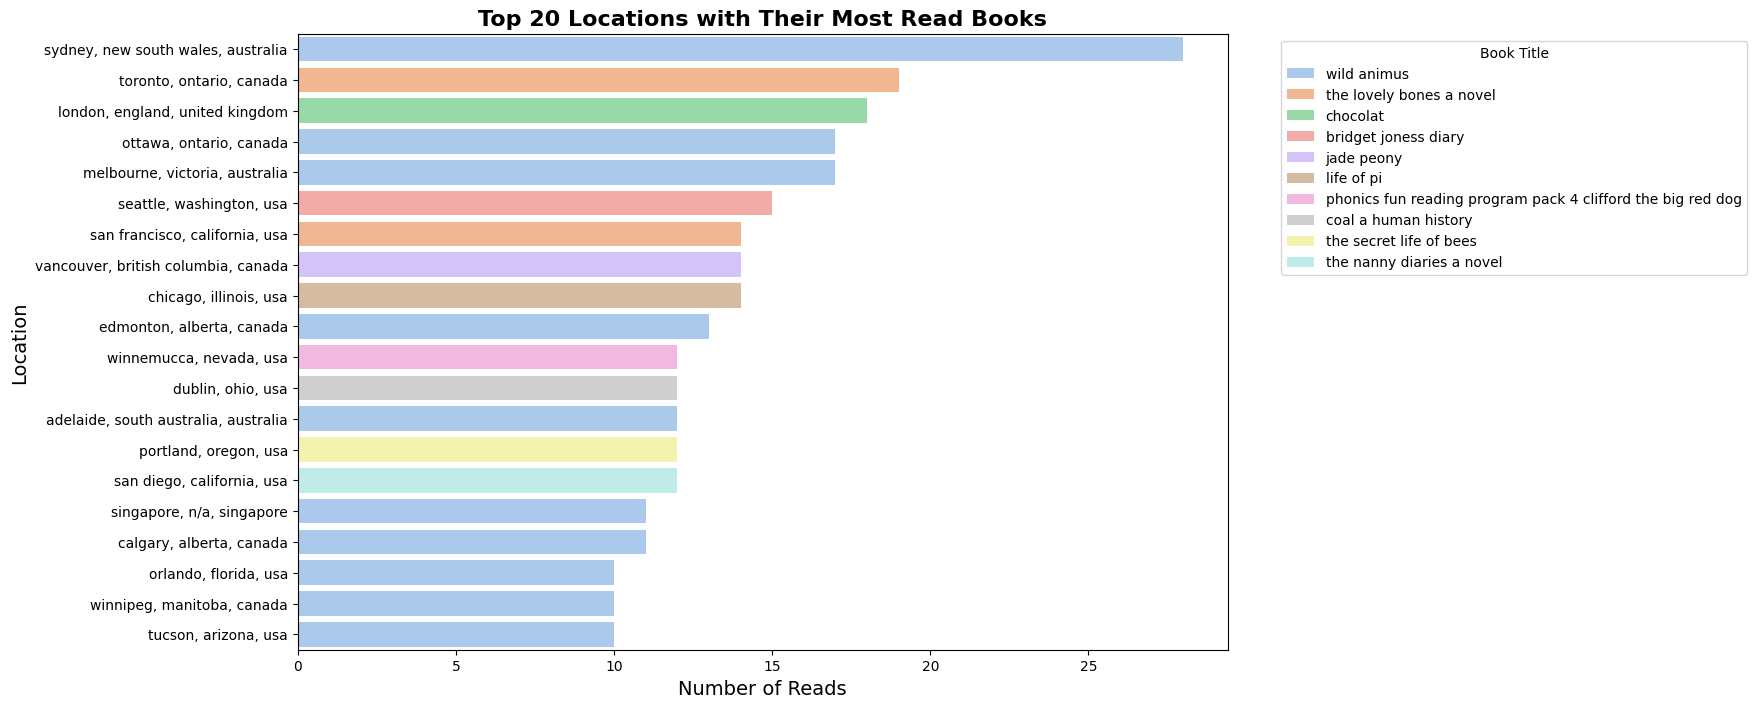

In [843]:
# Step 1: Count the number of times each book has been read in each location
location_book_count = all_cleaned.groupby(['location', 'mod_book_title']).size().reset_index(name='read_count')

# Step 2: Identify the most read book for each location
most_read_books_per_location = location_book_count.loc[location_book_count.groupby('location')['read_count'].idxmax()]

# Step 3: Sort by the number of reads in descending order and select the top 20 locations
top_most_read_books = most_read_books_per_location.sort_values(by='read_count', ascending=False).iloc[:20]

# Step 4: Plot the data
plt.figure(figsize=(12, 8))

# Create a barplot showing the most read books by location
sns.barplot(
    data=top_most_read_books,
    x='read_count',
    y='location',
    hue='mod_book_title',
    dodge=False,
    palette='pastel'
)

# Set the title and labels
plt.title('Top 20 Locations with Their Most Read Books', fontsize=16, fontweight='bold')
plt.xlabel('Number of Reads', fontsize=14)
plt.ylabel('Location', fontsize=14)

# Adjust legend
plt.legend(title='Book Title', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

### Most read book by country 

In [870]:
all_cleaned['location']

0                 stockton, california, usa
1                  timmins, ontario, canada
2                   ottawa, ontario, canada
3                             n/a, n/a, n/a
4                  sudbury, ontario, canada
                         ...               
1032340       providence, rhode island, usa
1032341                     orem, utah, usa
1032342    hopewell junction, new york, usa
1032343    hopewell junction, new york, usa
1032344    hopewell junction, new york, usa
Name: location, Length: 1031136, dtype: object

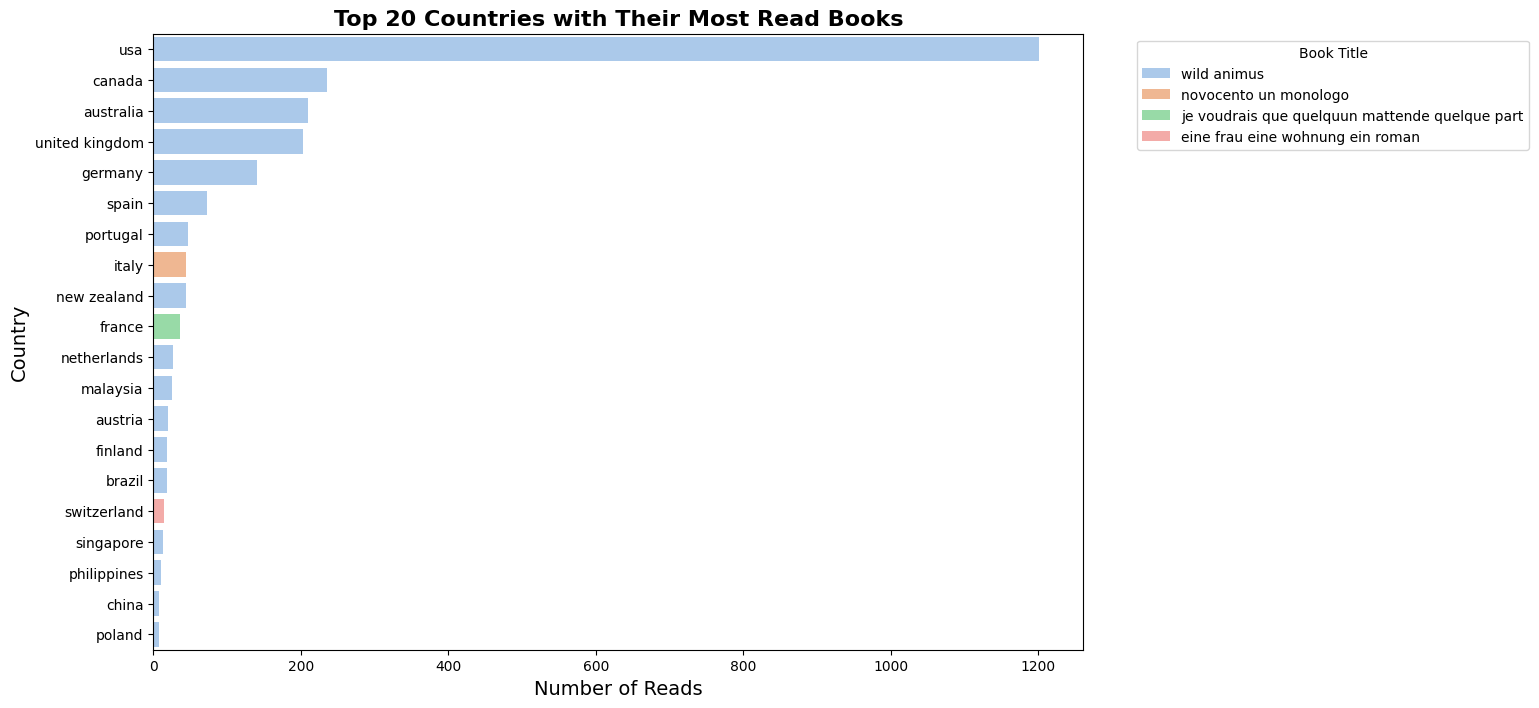

In [867]:
# Step 1: Extract country information from the 'location' column
# Assuming the format is "City, State, Country" or "City, Country"
all_cleaned['country'] = all_cleaned['location'].apply(lambda x: x.split(',')[-1].strip())
all_cleaned['country'] = all_cleaned['country'].replace('n/a',np.nan,regex = True)
all_cleaned['country'] = all_cleaned['country'].replace('',np.nan,regex = True)

# Step 2: Count the number of times each book has been read in each country
country_book_count = all_cleaned.groupby(['country', 'mod_book_title']).size().reset_index(name='read_count')

# Step 3: Identify the most read book for each country
most_read_books_per_country = country_book_count.loc[country_book_count.groupby('country')['read_count'].idxmax()]

# Step 4: Sort by the number of reads in descending order and select the top 20 countries
top_most_read_books = most_read_books_per_country.sort_values(by='read_count', ascending=False).iloc[:20]

# Step 5: Plot the data
plt.figure(figsize=(12, 8))

# Create a barplot showing the most read books by country
sns.barplot(
    data=top_most_read_books,
    x='read_count',
    y='country',
    hue='mod_book_title',
    dodge=False,
    palette='pastel'
)

# Set the title and labels
plt.title('Top 20 Countries with Their Most Read Books', fontsize=16, fontweight='bold')
plt.xlabel('Number of Reads', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Adjust legend
plt.legend(title='Book Title', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [848]:
all_cleaned.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age,age_numeric,age_bins,mod_book_author,mod_book_title,mod_publisher,country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0,18.0,Teenager,mark p o morford,classical mythology,oxford university press,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada,canada
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0,49.0,Adult,richard bruce wright,clara callan,harperflamingo canada,canada
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada,n/a
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,"sudbury, ontario, canada",unknown,NaN,unknown,richard bruce wright,clara callan,harperflamingo canada,canada


In [ ]:
# Access the specific row in the DataFrame where 'mod_book_title' matches the given string
most_read_book = all_cleaned[
    (all_cleaned['mod_book_title'] == 'wild animus') & 
    (all_cleaned['book_rating'] > 5)
]
# Display the row
most_read_book.count()

isbn                   192
book_title             192
book_author            192
year_of_publication    192
publisher              192
user_id                192
book_rating            192
location               192
age                    192
age_numeric            166
age_bins               192
mod_book_author        192
mod_book_title         192
mod_publisher          192
country                192
dtype: int64

### Most read books by country 

In [ ]:
def get_top_n_books_by_country(df, country_name, n=10):
    """
    Get the top 'n' most read books for a specified country from the DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing book reading data.
    - country_name (str): The name of the country to filter the books.
    - n (int): The number of top books to return. Default is 10.

    Returns:
    - pd.DataFrame: A DataFrame with the top 'n' most read books for the specified country.
    """
    # Step 1: Extract country information from the 'location' column
    df['country'] = df['location'].apply(lambda x: x.split(',')[-1].strip())

    # Step 2: Filter the dataset to include only entries where the country matches the specified country
    country_books = df[df['country'].str.lower() == country_name.lower()]

    # Step 3: Group by 'mod_book_title' to count the number of reads in the specified country
    book_count = country_books.groupby('mod_book_title').size().reset_index(name='read_count')

    # Step 4: Sort the books by their read count in descending order
    sorted_books = book_count.sort_values(by='read_count', ascending=False)

    # Step 5: Select the top 'n' most read books
    top_n_books = sorted_books.head(n)

    return top_n_books

top_10_books_germany = get_top_n_books_by_country(all_cleaned, 'Germany', n=10)

print("Top 10 Most Read Books in Germany:")
print(top_10_books_germany.head(10))

Top 10 Most Read Books in Germany:
                                          mod_book_title  read_count
14261                                        wild animus         141
10541                                        russendisko          53
3426                                        der vorleser          50
11567  stupid white men eine abrechnung mit dem ameri...          48
7158                                          illuminati          45
6164                     generation golf eine inspektion          43
8058                                lauf jane lauf roman          42
9203                                  mrder ohne gesicht          40
4354                                          die ppstin          39
2379             das parfum die geschichte eines morders          38


In [ ]:
top_10_books_france = get_top_n_books_by_country(all_cleaned, 'France', n=10)

print("Top 10 Most Read Books in France:")
print(top_10_books_france)

Top 10 Most Read Books in France:
                                      mod_book_title  read_count
1653  je voudrais que quelquun mattende quelque part          36
5742                                     wild animus          35
2041                               la nuit des temps          27
2779                le parfum histoire dun meurtrier          26
1120        et si cetait vrai if this were only true          24
3022                                lecume des jours          23
4506                                          ravage          23
4837                         stupeur et tremblements          20
658                                   comme un roman          20
3240                                     les fourmis          20


### Random Book recommendation 

In [882]:
def get_random_book_recommendations(df, num_recommendations=20):
    """
    Get a specified number of random book recommendations from the DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing book data.
    - num_recommendations (int): The number of random book recommendations to generate. Default is 20.
    
    Returns:
    - pd.DataFrame: A DataFrame containing the randomly selected book recommendations.
    """
    # Ensure that the number of recommendations does not exceed the number of available books
    num_recommendations = min(num_recommendations, len(df))
    
    # Select random books from the DataFrame
    random_books = df.sample(n=num_recommendations)  # random_state ensures reproducibility
    
    return random_books

# Example usage
random_recommendations = get_random_book_recommendations(all_cleaned, num_recommendations=20)

# Display the recommendations
random_recommendations[['mod_book_title', 'book_author', 'book_rating']]

,mod_book_title,book_author,book_rating
874143,no sympathy for a suburban white kid,Wyatt L. Brixy,0.0
784411,completefood counts,CORINNE T. NETZER,0.0
849521,allen tate,Thomas Underwood,0.0
898376,the trigger,Arthur C. Clarke,6.0
666193,tales of a drama queen red dress ink,Lee Nichols,8.0
876829,the new you,Kathleen Leverich,0.0
305179,the cat who went into the closet,Lilian Jackson Braun,0.0
324439,ranma 12 vol 7,Rumiko Takahashi,0.0
760773,cigars of the pharoah the adventures of tintin,Herge,0.0
398970,paradise county,Karen Robards,0.0


In [ ]:
# Step 1: Group by 'user_id' and count the number of ratings
user_rating_counts = all_cleaned.groupby('user_id')['book_rating'].count()

# Step 2: Filter users who have rated more than 100 books
users_with_100_plus_ratings = user_rating_counts[user_rating_counts > 100].index

# Step 3: Store the user_ids in a variable
filtered_user_ids = users_with_100_plus_ratings.tolist()

# Display the filtered user_ids
len(filtered_user_ids)

1648

In [883]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(all_cleaned['mod_publisher'])
tfidf = vectorizer.fit_transform(all_cleaned['mod_book_author'])
tfidf = vectorizer.fit_transform(all_cleaned['mod_book_title'])


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
# Filter the original DataFrame to include only the filtered users
filtered_data = all_cleaned[all_cleaned['user_id'].isin(filtered_user_ids)]

# Create the user-item matrix for the filtered users
user_item_matrix_filtered = filtered_data.pivot_table(index='user_id', columns='mod_book_title', values='book_rating').fillna(0)

# Display the user-item matrix for filtered users
print(user_item_matrix_filtered.head())

mod_book_title  006781 bk1 gags de boule et bil  \
user_id                                           
254.0                                       0.0   
507.0                                       0.0   
882.0                                       0.0   
1424.0                                      0.0   
1435.0                                      0.0   

mod_book_title  010100 a novel of the millennium  \
user_id                                            
254.0                                        0.0   
507.0                                        0.0   
882.0                                        0.0   
1424.0                                       0.0   
1435.0                                       0.0   

mod_book_title  010100 the novel of the millennium  \
user_id                                              
254.0                                          0.0   
507.0                                          0.0   
882.0                                          0.0   
1424.0 

In [ ]:
# Calculate cosine similarity between users
user_similarity_filtered = cosine_similarity(user_item_matrix_filtered)

# Convert to a DataFrame for easier interpretation
user_similarity_filtered_df = pd.DataFrame(user_similarity_filtered, index=user_item_matrix_filtered.index, columns=user_item_matrix_filtered.index)

# Display the user-user similarity matrix for filtered users
print(user_similarity_filtered_df.head())

user_id  254.0     507.0     882.0     1424.0    1435.0    1733.0    1903.0    \
user_id                                                                         
254.0    1.000000  0.061354  0.029039  0.000000  0.000000  0.000000       0.0   
507.0    0.061354  1.000000  0.000000  0.000000  0.000000  0.000000       0.0   
882.0    0.029039  0.000000  1.000000  0.000000  0.000000  0.011118       0.0   
1424.0   0.000000  0.000000  0.000000  1.000000  0.017139  0.000000       0.0   
1435.0   0.000000  0.000000  0.000000  0.017139  1.000000  0.001383       0.0   

user_id  2033.0    2110.0    2276.0    ...  275020.0  275970.0  276463.0  \
user_id                                ...                                 
254.0    0.058145  0.000000  0.000000  ...       0.0  0.043361  0.042759   
507.0    0.000000  0.000000  0.033549  ...       0.0  0.000000  0.017826   
882.0    0.000000  0.008349  0.000000  ...       0.0  0.000000  0.000000   
1424.0   0.000000  0.000000  0.000000  ...       0.0

In [ ]:
len(user_similarity_filtered_df.index)

1648

In [ ]:
# Find similar users to a given user_id (e.g., user_id=10)
similar_users = user_similarity_filtered_df.loc[254].sort_values(ascending=False)

# Display the top 5 most similar users
print(similar_users.head(5))

user_id
254.0       1.000000
66942.0     0.134020
88122.0     0.132195
203075.0    0.130730
29526.0     0.126962
Name: 254.0, dtype: float64


In [ ]:
# # Calculate cosine similarity between books
# item_similarity_filtered = cosine_similarity(user_item_matrix_filtered.T)

# # Convert to a DataFrame for easier interpretation
# item_similarity_filtered_df = pd.DataFrame(item_similarity_filtered, index=user_item_matrix_filtered.columns, columns=user_item_matrix_filtered.columns)

# # Display the item-item similarity matrix for filtered users
# print(item_similarity_filtered_df.head())

In [ ]:
# # Find similar books to a given book_id (e.g., book_id=123)
# similar_books_filtered = item_similarity_filtered_df[123].sort_values(ascending=False)

# # Display the top 5 most similar books
# print(similar_books_filtered.head(5))

## Web scrapping function 

In [ ]:
# import aiohttp
# import asyncio
# import pandas as pd
# import nest_asyncio
# from asyncio import Semaphore
# import logging

# # Apply the nest_asyncio to allow nested event loops
# nest_asyncio.apply()

# # Enable logging for debugging
# logging.basicConfig(level=logging.DEBUG)
# logger = logging.getLogger()

# # Set the maximum number of concurrent requests (adjust based on the API rate limit)
# MAX_CONCURRENT_REQUESTS = 5
# semaphore = Semaphore(MAX_CONCURRENT_REQUESTS)

# async def fetch_annotation(session, isbn13):
#     async with semaphore:
#         url = f'https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn13}'
#         try:
#             async with session.get(url) as response:
#                 logger.info(f'Fetching ISBN: {isbn13} with status: {response.status}')
#                 if response.status == 429:  # Too many requests
#                     logger.warning(f'Rate limit hit for ISBN: {isbn13}, retrying after 60 seconds')
#                     await asyncio.sleep(60)  # Wait 60 seconds and try again
#                     return await fetch_annotation(session, isbn13)  # Retry
#                 elif response.status == 200:
#                     data = await response.json()
#                     logger.debug(f'Received data for ISBN: {isbn13}: {data}')
#                     # key = f'ISBN:{isbn13}'
#                     if 'items' in data:
#                         annotation = data['items'][0]['volumeInfo'].get('description', 'No annotation found')
#                         return annotation if annotation else 'No annotation found'
#                     else:
#                         return 'No annotation found'
#                 else:
#                     logger.error(f'Error fetching ISBN: {isbn13}, status code: {response.status}')
#                     return 'Error fetching annotation'
#         except Exception as e:
#             logger.error(f'Exception occurred for ISBN: {isbn13}: {e}')
#             return 'Error fetching annotation'

# async def fetch_annotations_for_dataframe(smol_df, rate_limit=5):
#     async with aiohttp.ClientSession() as session:
#         tasks = []
#         for isbn13 in smol_df['isbn']:
#             tasks.append(fetch_annotation(session, isbn13))
#             if len(tasks) % rate_limit == 0:  # After every 'rate_limit' requests
#                 await asyncio.sleep(1)  # Sleep to respect the rate limit
#         annotations = await asyncio.gather(*tasks)
#     smol_df['annotation'] = annotations
#     return smol_df

# async def main():
#     global smol_df
#     # Assuming smol_df is your existing DataFrame with an 'isbn13' column
#     smol_df = await fetch_annotations_for_dataframe(smol_df)
#     print(smol_df.head())  # Display the updated DataFrame with annotations

# # Instead of asyncio.run(main()), we use an event loop directly:
# loop = asyncio.get_event_loop()
# loop.run_until_complete(main())

In [ ]:
# smol_df

In [ ]:
# import aiohttp
# import asyncio
# import pandas as pd
# import nest_asyncio
# from asyncio import Semaphore
# import logging

# # Apply the nest_asyncio to allow nested event loops
# nest_asyncio.apply()

# # Enable logging for debugging
# logging.basicConfig(level=logging.DEBUG)
# logger = logging.getLogger()

# # Set the maximum number of concurrent requests (adjust based on the API rate limit)
# MAX_CONCURRENT_REQUESTS = 5
# semaphore = Semaphore(MAX_CONCURRENT_REQUESTS)

# async def fetch_book_info(session, isbn13):
#     async with semaphore:
#         url = f'https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn13}'
#         try:
#             async with session.get(url) as response:
#                 logger.info(f'Fetching ISBN: {isbn13} with status: {response.status}')
#                 if response.status == 429:  # Too many requests
#                     logger.warning(f'Rate limit hit for ISBN: {isbn13}, retrying after 60 seconds')
#                     await asyncio.sleep(60)  # Wait 60 seconds and try again
#                     return await fetch_book_info(session, isbn13)  # Retry
#                 elif response.status == 200:
#                     data = await response.json()
#                     logger.debug(f'Received data for ISBN: {isbn13}: {data}')
#                     if 'items' in data:
#                         volume_info = data['items'][0]['volumeInfo']
#                         annotation = volume_info.get('description', 'No annotation found')
#                         genres = volume_info.get('categories', ['No genre found'])
#                         genre = ', '.join(genres)
#                         return annotation, genre
#                     else:
#                         return 'No annotation found', 'No genre found'
#                 else:
#                     logger.error(f'Error fetching ISBN: {isbn13}, status code: {response.status}')
#                     return 'Error fetching annotation', 'Error fetching genre'
#         except Exception as e:
#             logger.error(f'Exception occurred for ISBN: {isbn13}: {e}')
#             return 'Error fetching annotation', 'Error fetching genre'

# async def fetch_info_for_dataframe(smol_df, rate_limit=5):
#     async with aiohttp.ClientSession() as session:
#         tasks = []
#         for isbn13 in smol_df['isbn']:
#             tasks.append(fetch_book_info(session, isbn13))
#             if len(tasks) % rate_limit == 0:  # After every 'rate_limit' requests
#                 await asyncio.sleep(1)  # Sleep to respect the rate limit
#         results = await asyncio.gather(*tasks)
    
#     annotations, genres = zip(*results)
#     smol_df['annotation'] = annotations
#     smol_df['genre'] = genres
#     return smol_df

# async def main():
#     global smol_df
#     # Assuming smol_df is your existing DataFrame with an 'isbn' column
#     smol_df = await fetch_info_for_dataframe(smol_df)
#     print(smol_df.head())  # Display the updated DataFrame with annotations and genres

# # Instead of asyncio.run(main()), we use an event loop directly:
# loop = asyncio.get_event_loop()
# loop.run_until_complete(main())